# Домашнее задание к занятию 2.1: Деревья решений. Классификация

## Обзор прошедшего занятия

Что мы делали в классе:

**Задание 1**
* строили деревья
* критерии информативности которых написали даже сами
* визуализировали границы принятия решений в 2d
* и рисовали сами деревья


**Задание 2**
* приняли участие в соревновании на Kaggle, переварив кучу текстовых фичей в численные, проведя кросс-валидацию и сделав сабмит


**Задание 3**
* построили руками несколько метрик качества бинарной классификации


**Задание 4**
* использовали их для оценки классификации разделения статей Ведомостей по топикам

*дополнительно было много приятных ништяков. Например, облако слов, мультипоточность в целях парсинга, удобный инструмент для нахождения правильной css разметки, сохранение моделей в статичные файлы, разделение строк на слова и лемматизация этих слов*

## Домашнее задание

**Lvl 1:**

* взять подготовленные раннее данные из задачи **Titanic**, обучиться на них с помощью дерева решений и кросс-валидации и сделать сабмит
* кросс-валидацию желательно сделать сразу по нескольким фичам ( параметр *grid* в *GridSearchCV* )
* определить самые важные фичи
* вывести дерево решений (можете попробовать установить pydot и webgraphviz для отрисовки деревьев внутри ноутбука)

**Результат:** скрины нового сабмита на Kaggle и построенного дерева

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
from pylab import rcParams
rcParams['figure.figsize'] = (9, 6)

In [97]:
ls

'1 decision trees.ipynb'     '5 vedomosti classifying.ipynb'
'2 competition.ipynb'         data/
'3 metrics.ipynb'            'hw5_2 homework decision tree.ipynb'
'4 vedomosti parsing.ipynb'  'ML 1 - Decision Trees.pdf'


In [52]:
Y_train=pd.read_csv('/home/arseny/data/4 building models/data-scientist4-master (12 Sklearn)/3. Python Preprocessing/Sklearn/Y_train.csv')
Y_test=pd.read_csv('/home/arseny/data/4 building models/data-scientist4-master (12 Sklearn)/3. Python Preprocessing/Sklearn/Y_test.csv')
data_train=pd.read_csv('/home/arseny/data/4 building models/data-scientist4-master (12 Sklearn)/3. Python Preprocessing/Sklearn/X_train_imputed_scaled.csv', \
                    sep=';')
data_test=pd.read_csv('/home/arseny/data/4 building models/data-scientist4-master (12 Sklearn)/3. Python Preprocessing/Sklearn/X_test_imputed_scaled.csv')
data_test_for_predictions=pd.read_csv('/home/arseny/data/4 building models/data-scientist4-master (12 Sklearn)/3. Python Preprocessing/Sklearn/X_test_for_predictions.csv', \
                    sep=';')
original_data_test=pd.read_csv('/home/arseny/data/4 building models/data-scientist4-master (12 Sklearn)/3. Python Preprocessing/Sklearn/titanic/test.csv')
#predictions=pd.read_csv('/home/arseny/data/4 building models/data-scientist4-master (12 Sklearn)/3. Python Preprocessing/Sklearn/Predictions.csv')
#/home/arseny/data/4 building models/data-scientist4-master (12 Sklearn)/3. Python Preprocessing/Sklearn

In [4]:
Y_train=Y_train['Survived']
Y_test=Y_test['Survived']

In [5]:
data_train.head()

Unnamed: 0       Age     SibSp     Parch      Fare    isMale  Pclass_1  \
0           0 -0.592481  0.432793 -0.473674 -0.502445  0.737695 -0.565685   
1           1  0.638789  0.432793 -0.473674  0.786845 -1.355574  1.767767   
2           2 -0.284663 -0.474545 -0.473674 -0.488854 -1.355574 -0.565685   
3           3  0.407926  0.432793 -0.473674  0.420730 -1.355574  1.767767   
4           4  0.407926 -0.474545 -0.473674 -0.486337  0.737695 -0.565685   

   Pclass_2  Pclass_3  Embarked_C  Embarked_Q  Embarked_S  
0 -0.510152  0.902587   -0.482043   -0.307562    0.619306  
1 -0.510152 -1.107926    2.074505   -0.307562   -1.614710  
2 -0.510152  0.902587   -0.482043   -0.307562    0.619306  
3 -0.510152 -1.107926   -0.482043   -0.307562    0.619306  
4 -0.510152  0.902587   -0.482043   -0.307562    0.619306

In [14]:
pd.read_csv?

In [6]:
print(data_train.shape, Y_train.shape, data_test.shape, Y_test.shape, data_test_for_predictions.shape \
          #, predictions.shape
     )

(891, 12) (891,) (179, 12) (179,) (418, 12)


In [357]:
data_test.head(3)

Age     SibSp     Parch      Fare    isMale  Pclass_1  Pclass_2  \
0 -0.130754 -0.474545 -0.473674 -0.386671 -1.355574 -0.565685  1.960202   
1  0.000000 -0.474545  2.008933 -0.198244 -1.355574 -0.565685 -0.510152   
2 -0.284663  0.432793 -0.473674 -0.490280  0.737695 -0.565685 -0.510152   

   Pclass_3  Embarked_C  Embarked_Q  Embarked_S  
0 -1.107926   -0.482043   -0.307562    0.619306  
1  0.902587    2.074505   -0.307562   -1.614710  
2  0.902587   -0.482043   -0.307562    0.619306

In [7]:
data_test_for_predictions.head(3)

Unnamed: 0       Age     SibSp     Parch      Fare    isMale  Pclass_1  \
0           0  0.369449 -0.474545 -0.473674 -0.490783  0.737695 -0.565685   
1           1  1.331378  0.432793 -0.473674 -0.507479 -1.355574 -0.565685   
2           2  2.485693 -0.474545 -0.473674 -0.453367  0.737695 -0.565685   

   Pclass_2  Pclass_3  Embarked_C  Embarked_Q  Embarked_S  
0 -0.510152  0.902587   -0.482043    3.251373   -1.614710  
1 -0.510152  0.902587   -0.482043   -0.307562    0.619306  
2  1.960202 -1.107926   -0.482043    3.251373   -1.614710

In [55]:
original_data_test.head(3)

PassengerId  Pclass                              Name     Sex   Age  SibSp  \
0          892       3                  Kelly, Mr. James    male  34.5      0   
1          893       3  Wilkes, Mrs. James (Ellen Needs)  female  47.0      1   
2          894       2         Myles, Mr. Thomas Francis    male  62.0      0   

   Parch  Ticket    Fare Cabin Embarked  
0      0  330911  7.8292   NaN        Q  
1      0  363272  7.0000   NaN        S  
2      0  240276  9.6875   NaN        Q

In [18]:
#adding target to see distribution
data_train['target']=Y_train#['Survived']
#Y_train.head()
#Y_train['Survived']

/home/arseny/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/arseny/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


<function matplotlib.pyplot.show(*args, **kw)>

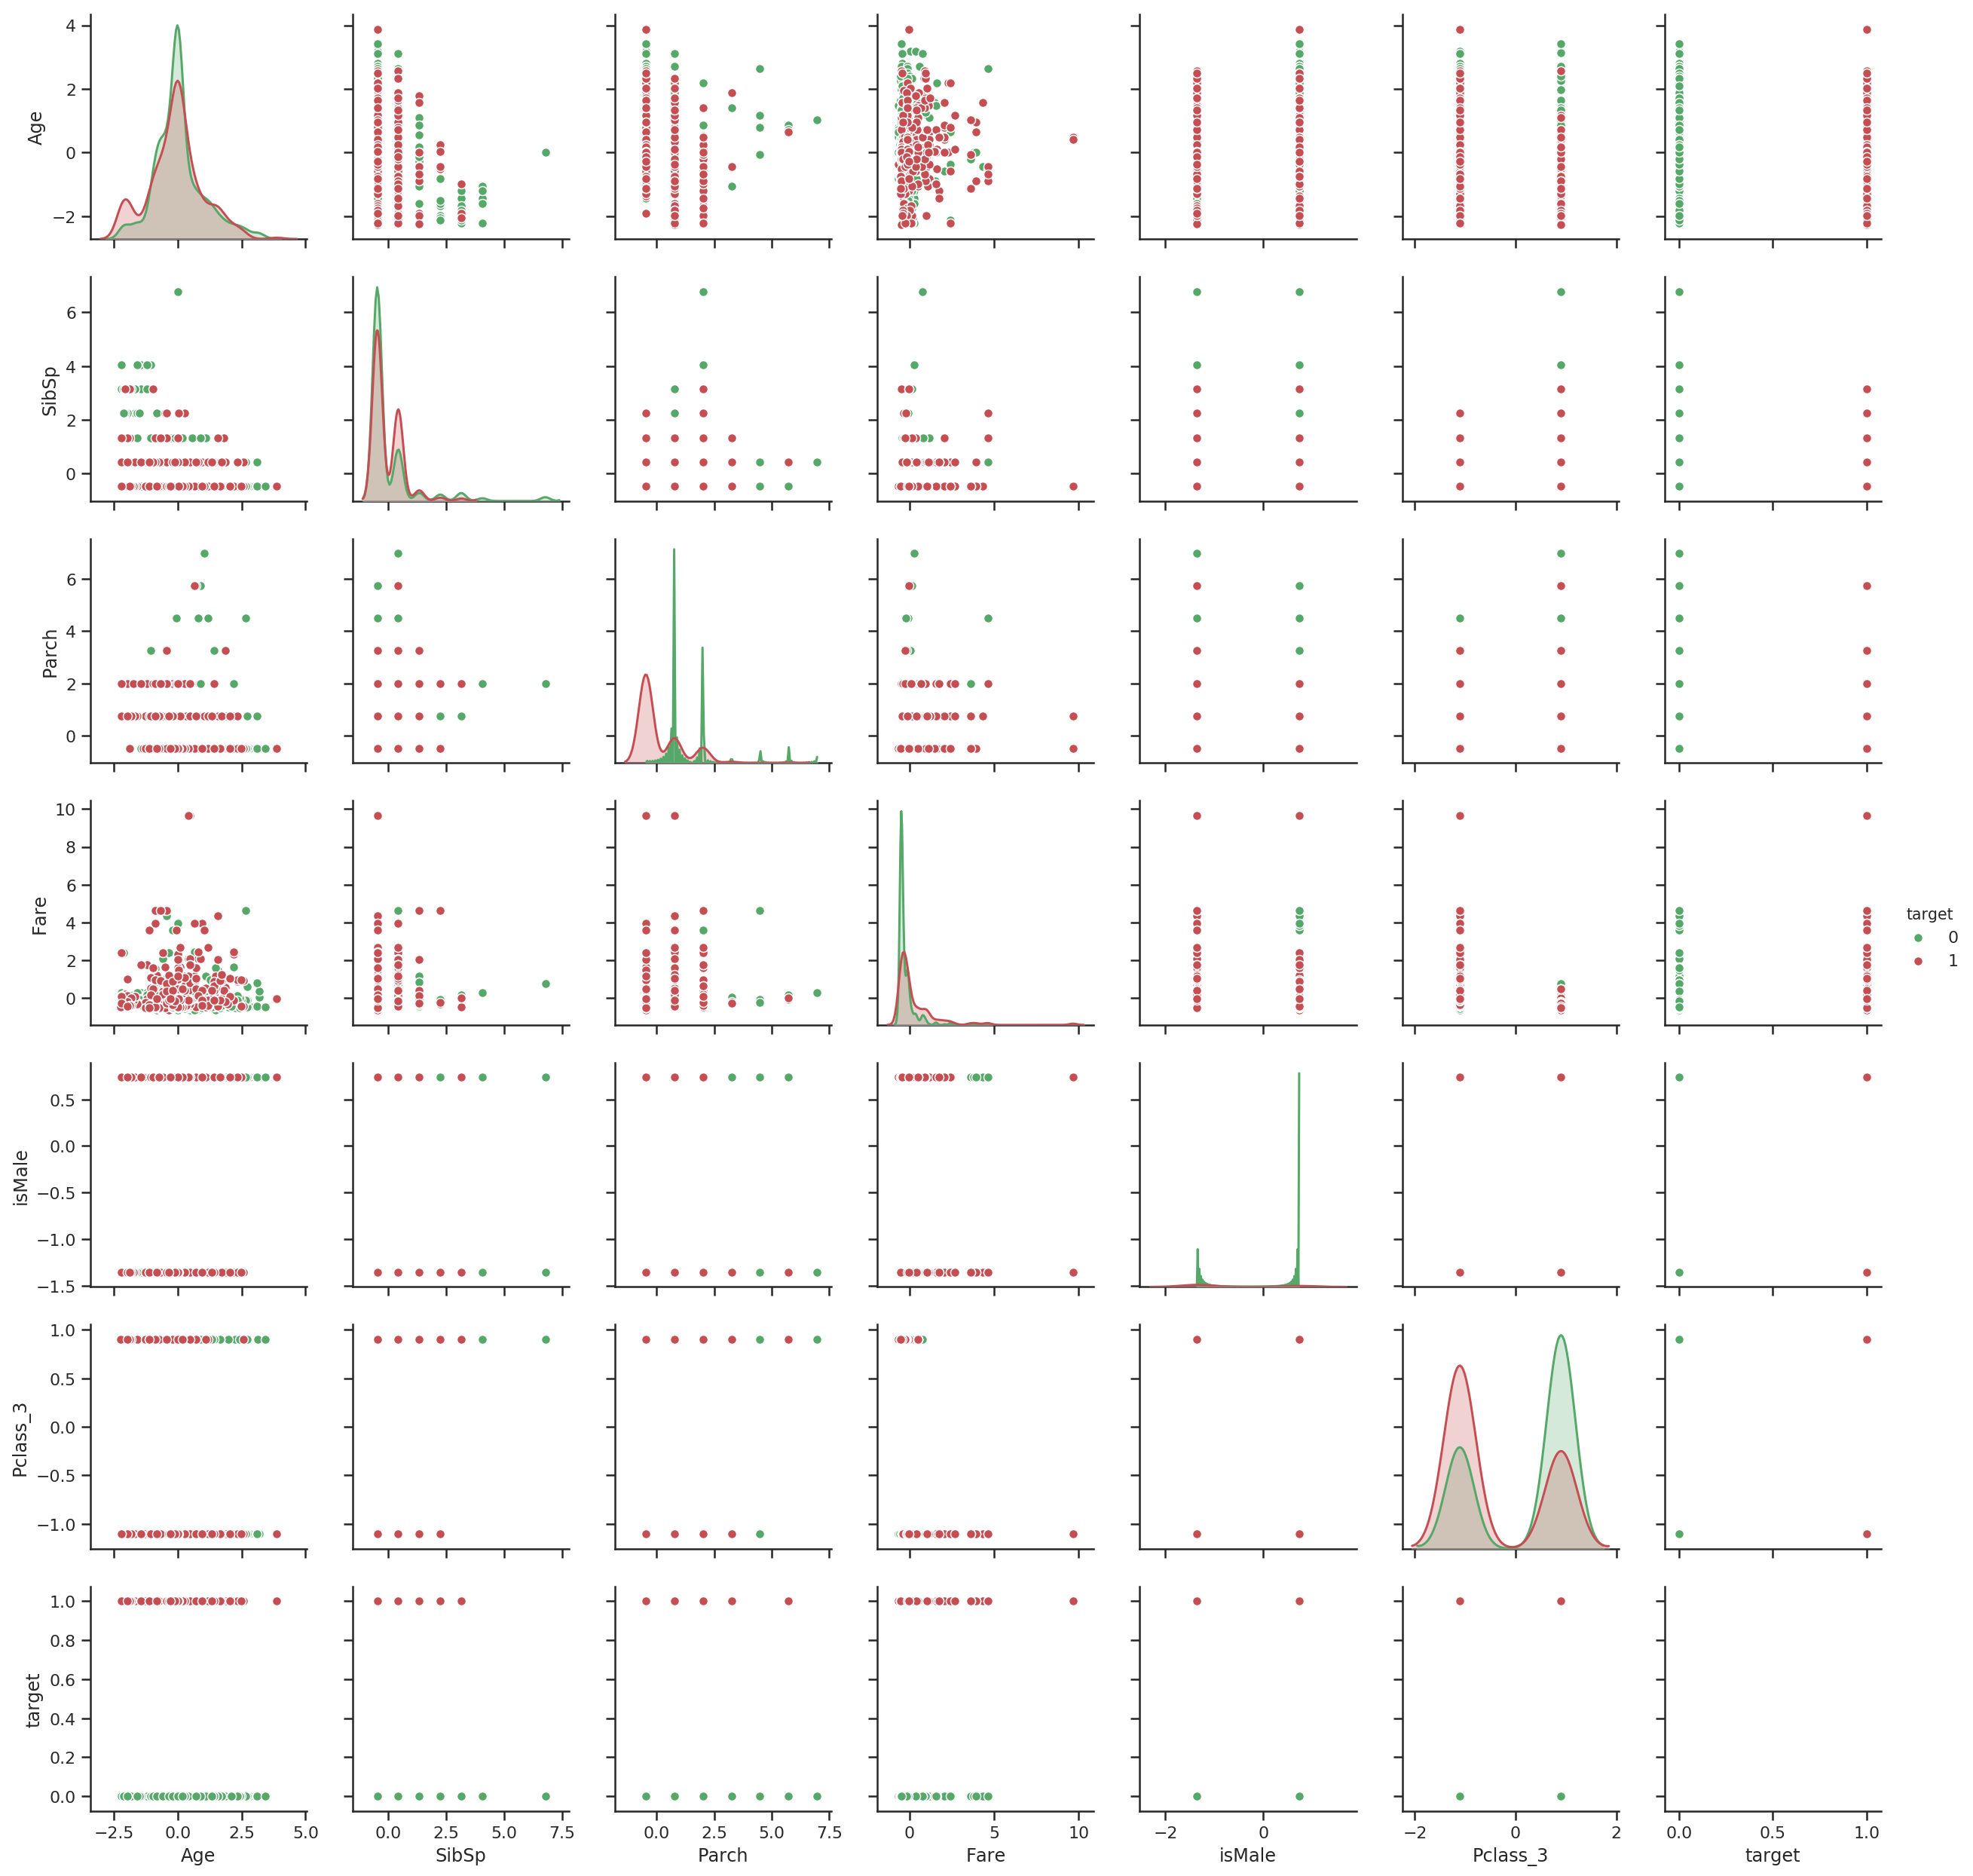

In [33]:
#data_train.head()
sns.set(style='ticks')
sns.pairplot(data_train[['Age', 
'SibSp', 
'Parch',
'Fare',
'isMale', 
#'Pclass_1', 
#'Pclass_2', 
'Pclass_3', 
#'Embarked_C',
#'Embarked_Q',
#'Embarked_S',
'target' ]], palette=('g', 'r'), hue='target')
plt.show

In [ ]:
#Probably sibsp will be in the root of the tree 

In [19]:
data_test_for_predictions.columns

Index(['Age', 'SibSp', 'Parch', 'Fare', 'isMale', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [60]:
#delete column wich transformation from csv gave
data_test.drop(columns='Unnamed: 0', inplace=True)
data_train.drop(columns='Unnamed: 0', inplace=True)
data_test_for_predictions.drop(columns='Unnamed: 0', inplace=True)

In [10]:
#data_test_for_predictions.drop(columns='Unnamed: 0', inplace=True)

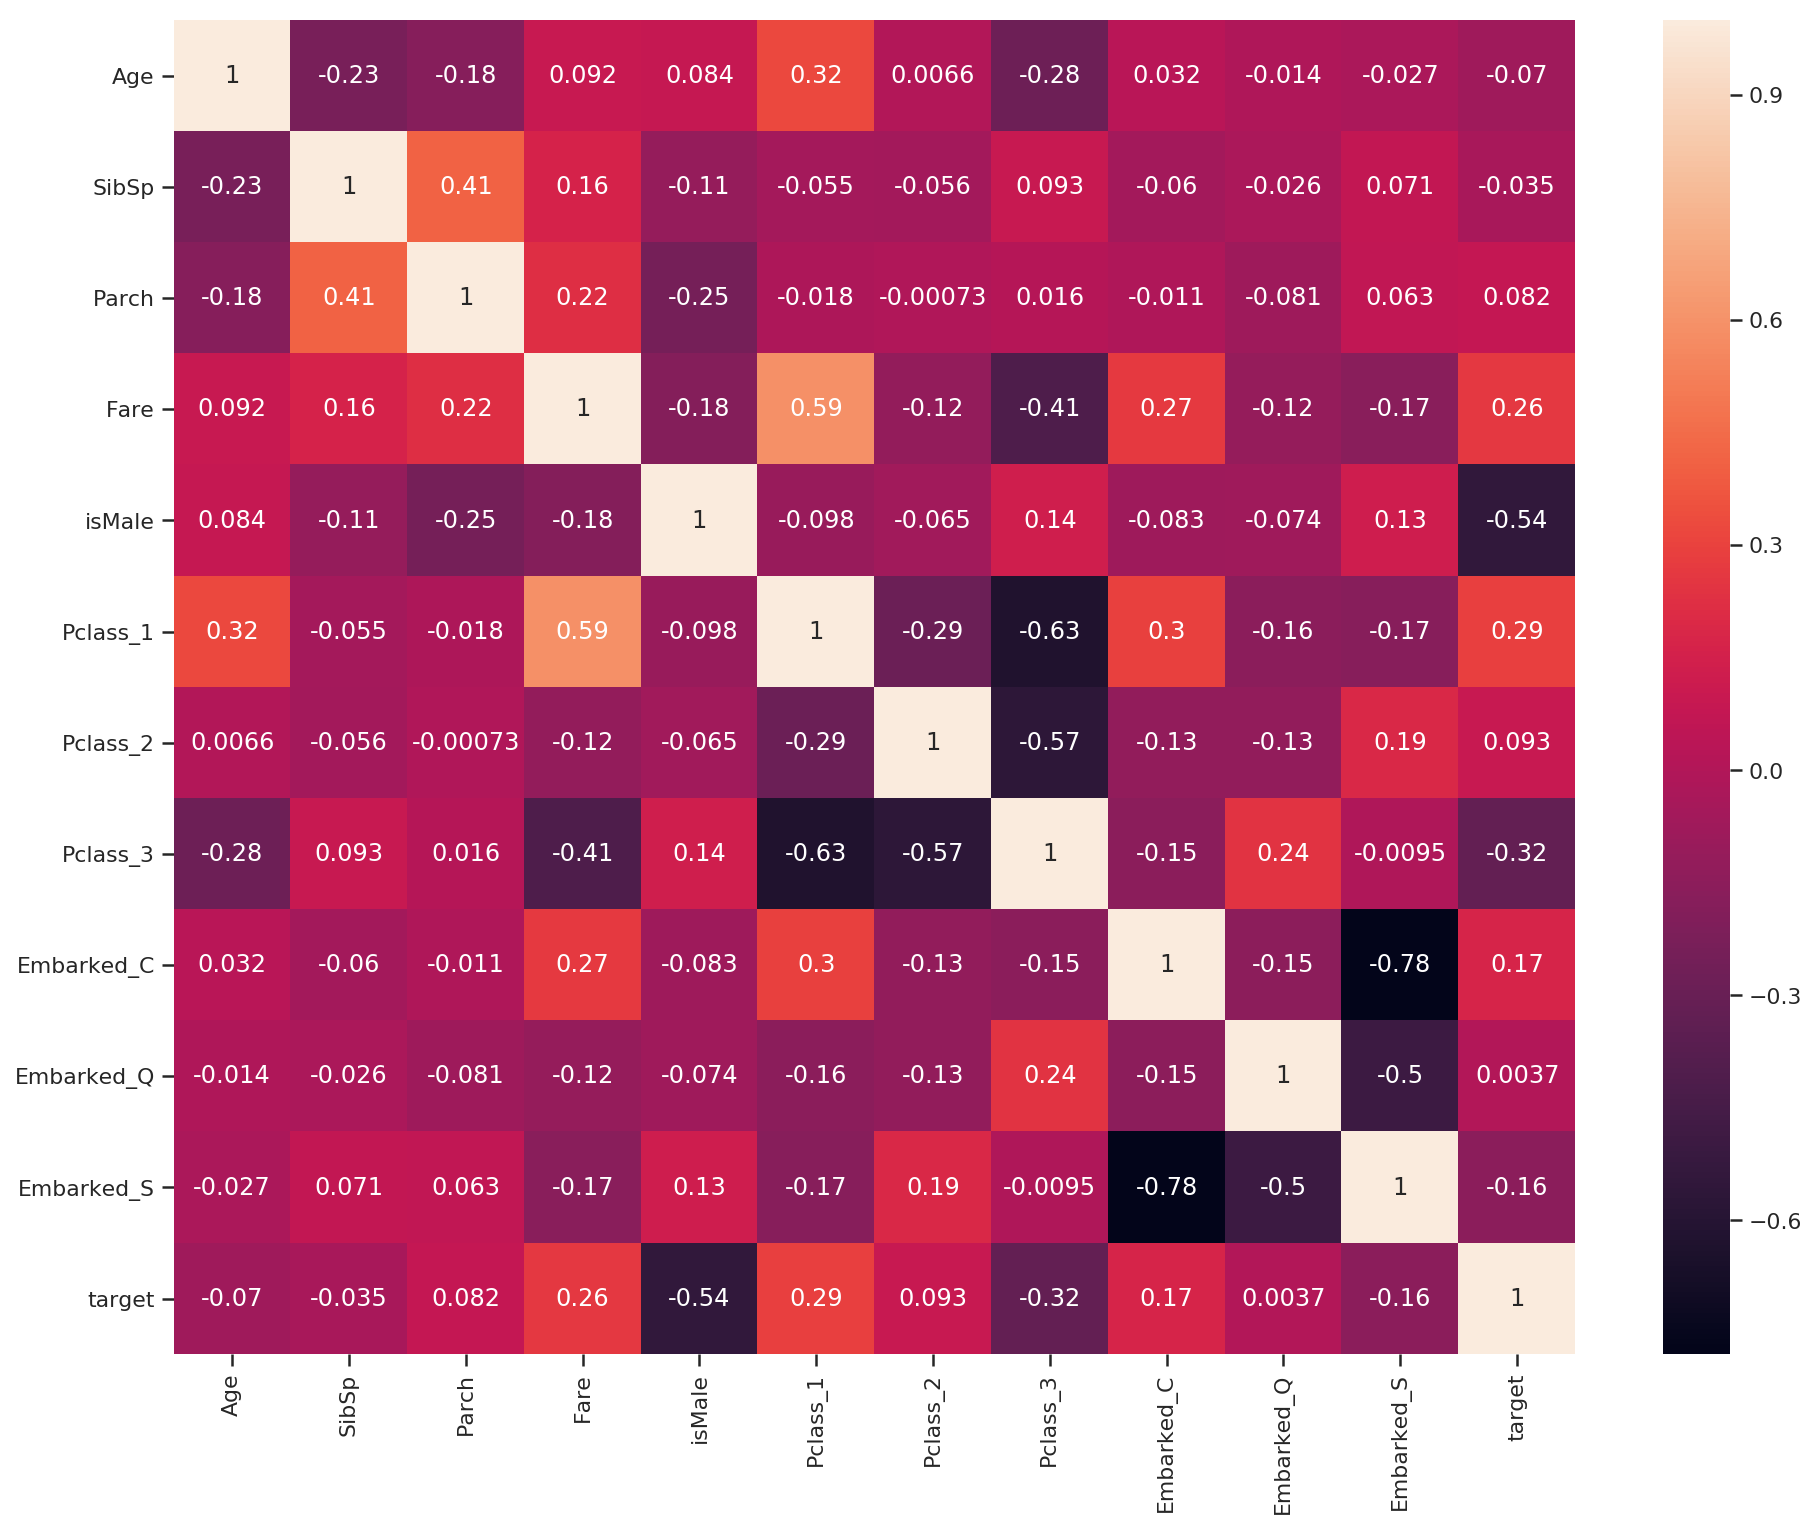

In [36]:
corr=data_train.corr()

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(15.7, 12.27) )        # Sample figsize in inches

sns.heatmap(corr, annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [ ]:
#No. Looks like there will be IsMale column in the root

In [22]:
data_train.drop(columns='target', inplace=True)

In [23]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

In [24]:
clf.fit(data_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [25]:
#clf.get_params(deep=False)
print(clf.tree_.max_depth)
#print(clf.tree_.estimatros_)

#[estimator.tree_.max_depth for estimator in forest.estimators_]

21


In [26]:
clf.predict(data_test)

array([1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1])

In [27]:
for i in zip(clf.predict(data_test), Y_test):
    print(i, i[0], i[1])

(1, 1) 1 1
(1, 1) 1 1
(0, 0) 0 0
(0, 0) 0 0
(0, 0) 0 0
(0, 1) 0 1
(0, 0) 0 0
(1, 1) 1 1
(0, 0) 0 0
(0, 0) 0 0
(0, 0) 0 0
(0, 0) 0 0
(0, 0) 0 0
(0, 0) 0 0
(0, 0) 0 0
(1, 1) 1 1
(0, 0) 0 0
(1, 1) 1 1
(0, 0) 0 0
(0, 0) 0 0
(0, 0) 0 0
(1, 1) 1 1
(1, 1) 1 1
(0, 0) 0 0
(0, 0) 0 0
(0, 0) 0 0
(0, 0) 0 0
(1, 1) 1 1
(1, 1) 1 1
(1, 1) 1 1
(0, 0) 0 0
(0, 0) 0 0
(1, 1) 1 1
(0, 0) 0 0
(0, 0) 0 0
(0, 0) 0 0
(0, 0) 0 0
(0, 0) 0 0
(1, 1) 1 1
(0, 0) 0 0
(0, 0) 0 0
(1, 1) 1 1
(0, 0) 0 0
(0, 0) 0 0
(1, 1) 1 1
(0, 0) 0 0
(1, 1) 1 1
(1, 1) 1 1
(1, 1) 1 1
(0, 0) 0 0
(0, 0) 0 0
(0, 0) 0 0
(1, 1) 1 1
(1, 1) 1 1
(0, 0) 0 0
(0, 0) 0 0
(0, 0) 0 0
(0, 1) 0 1
(0, 0) 0 0
(1, 1) 1 1
(1, 1) 1 1
(1, 1) 1 1
(0, 0) 0 0
(0, 0) 0 0
(0, 0) 0 0
(0, 0) 0 0
(0, 0) 0 0
(1, 1) 1 1
(0, 0) 0 0
(0, 0) 0 0
(1, 1) 1 1
(0, 0) 0 0
(0, 0) 0 0
(0, 0) 0 0
(1, 1) 1 1
(1, 1) 1 1
(0, 0) 0 0
(0, 0) 0 0
(1, 1) 1 1
(0, 0) 0 0
(1, 1) 1 1
(1, 1) 1 1
(0, 0) 0 0
(1, 1) 1 1
(1, 1) 1 1
(0, 0) 0 0
(0, 0) 0 0
(0, 0) 0 0
(1, 1) 1 1
(1, 1) 1 1
(0, 0) 0 0

In [28]:
#Y_test=Y_test.sort_values(by='Unnamed: 0')

Accuracy=1-sum(abs(clf.predict(data_test)-Y_test))/len(Y_test)
Precision=sum(clf.predict(data_test)*Y_test)/ \
    (sum(abs(clf.predict(data_test)*Y_test))+sum(clf.predict(data_test)*(1-Y_test)))
Recall=sum(clf.predict(data_test)*Y_test)/ \
    (sum(clf.predict(data_test)*Y_test)+sum((1-clf.predict(data_test))*Y_test))
F1=2*Precision*Recall/(Precision+Recall)

print(Accuracy, Precision, Recall, F1)



0.9720670391061452 1.0 0.927536231884058 0.9624060150375939


In [ ]:
#feature importance: 7 features > 1%

In [29]:

sorted(zip(data_test.columns, clf.feature_importances_), key=lambda x: 1/x[1])

[('isMale', 0.30933518862833875),
 ('Age', 0.24575472611656174),
 ('Fare', 0.2377024951718054),
 ('Pclass_3', 0.07747438494152145),
 ('SibSp', 0.05142504970223222),
 ('Parch', 0.02902152714053652),
 ('Pclass_1', 0.027555140952908418),
 ('Embarked_S', 0.009687765222838736),
 ('Embarked_C', 0.004867012713327213),
 ('Pclass_2', 0.0037683906802908713),
 ('Embarked_Q', 0.003408318729638833)]

In [373]:
from sklearn.tree import export_graphviz

def get_tree_dot_view(clf, feature_names=None, class_names=None):
    print(export_graphviz(clf, out_file=None, filled=True, feature_names=feature_names, class_names=class_names))

In [374]:
get_tree_dot_view(clf, list(data_train.columns), ['0','1'])

digraph Tree {
node [shape=box, style="filled", color="black"] ;
0 [label="isMale <= -0.309\ngini = 0.473\nsamples = 891\nvalue = [549, 342]\nclass = 0", fillcolor="#e5813960"] ;
1 [label="Pclass_3 <= -0.103\ngini = 0.383\nsamples = 314\nvalue = [81, 233]\nclass = 1", fillcolor="#399de5a6"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="Age <= -2.093\ngini = 0.1\nsamples = 170\nvalue = [9, 161]\nclass = 1", fillcolor="#399de5f1"] ;
1 -> 2 ;
3 [label="Parch <= 1.388\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = 0", fillcolor="#e5813900"] ;
2 -> 3 ;
4 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = 1", fillcolor="#399de5ff"] ;
3 -> 4 ;
5 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = 0", fillcolor="#e58139ff"] ;
3 -> 5 ;
6 [label="Fare <= -0.067\ngini = 0.091\nsamples = 168\nvalue = [8, 160]\nclass = 1", fillcolor="#399de5f2"] ;
2 -> 6 ;
7 [label="Fare <= -0.08\ngini = 0.182\nsamples = 69\nvalue = [7, 62]\nclass = 1", fillcolor="#399de5e2

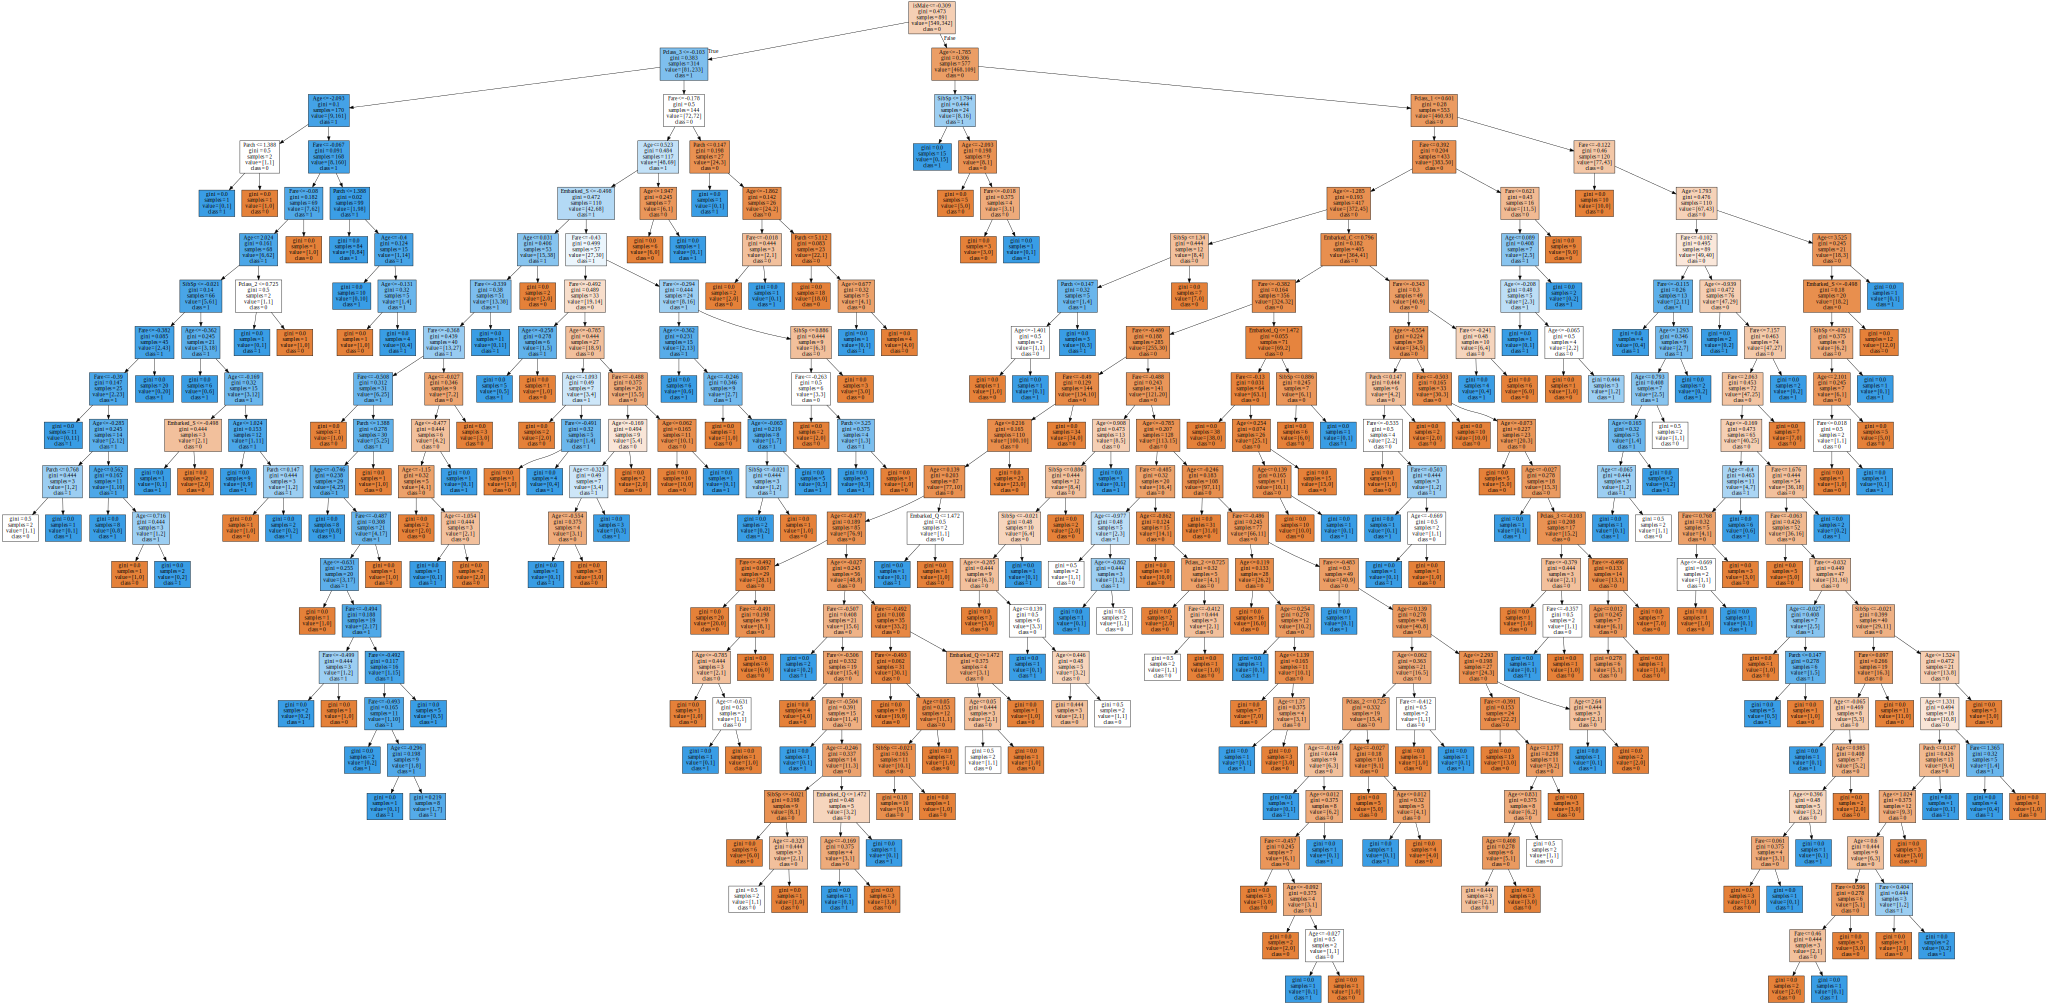

In [375]:
import graphviz
#from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

# feature matrix
X = data_train

# target vector
y = Y_train

# class labels
labels = data_train.columns

graph = Source(tree.export_graphviz(clf, out_file=None#'titanic_decision_tree.svg'
   , feature_names=labels, class_names=['0', '1'] 
   , filled = True))
display(SVG(graph.pipe(format='svg')))

In [135]:
#graph?
#dot.render('test-output/round-table.gv', view=True)
#dot.render('test-output/titanic_decision_tree.svg', view=True)
graph.format='png'

In [136]:
graph.render()

'Source.gv.png'

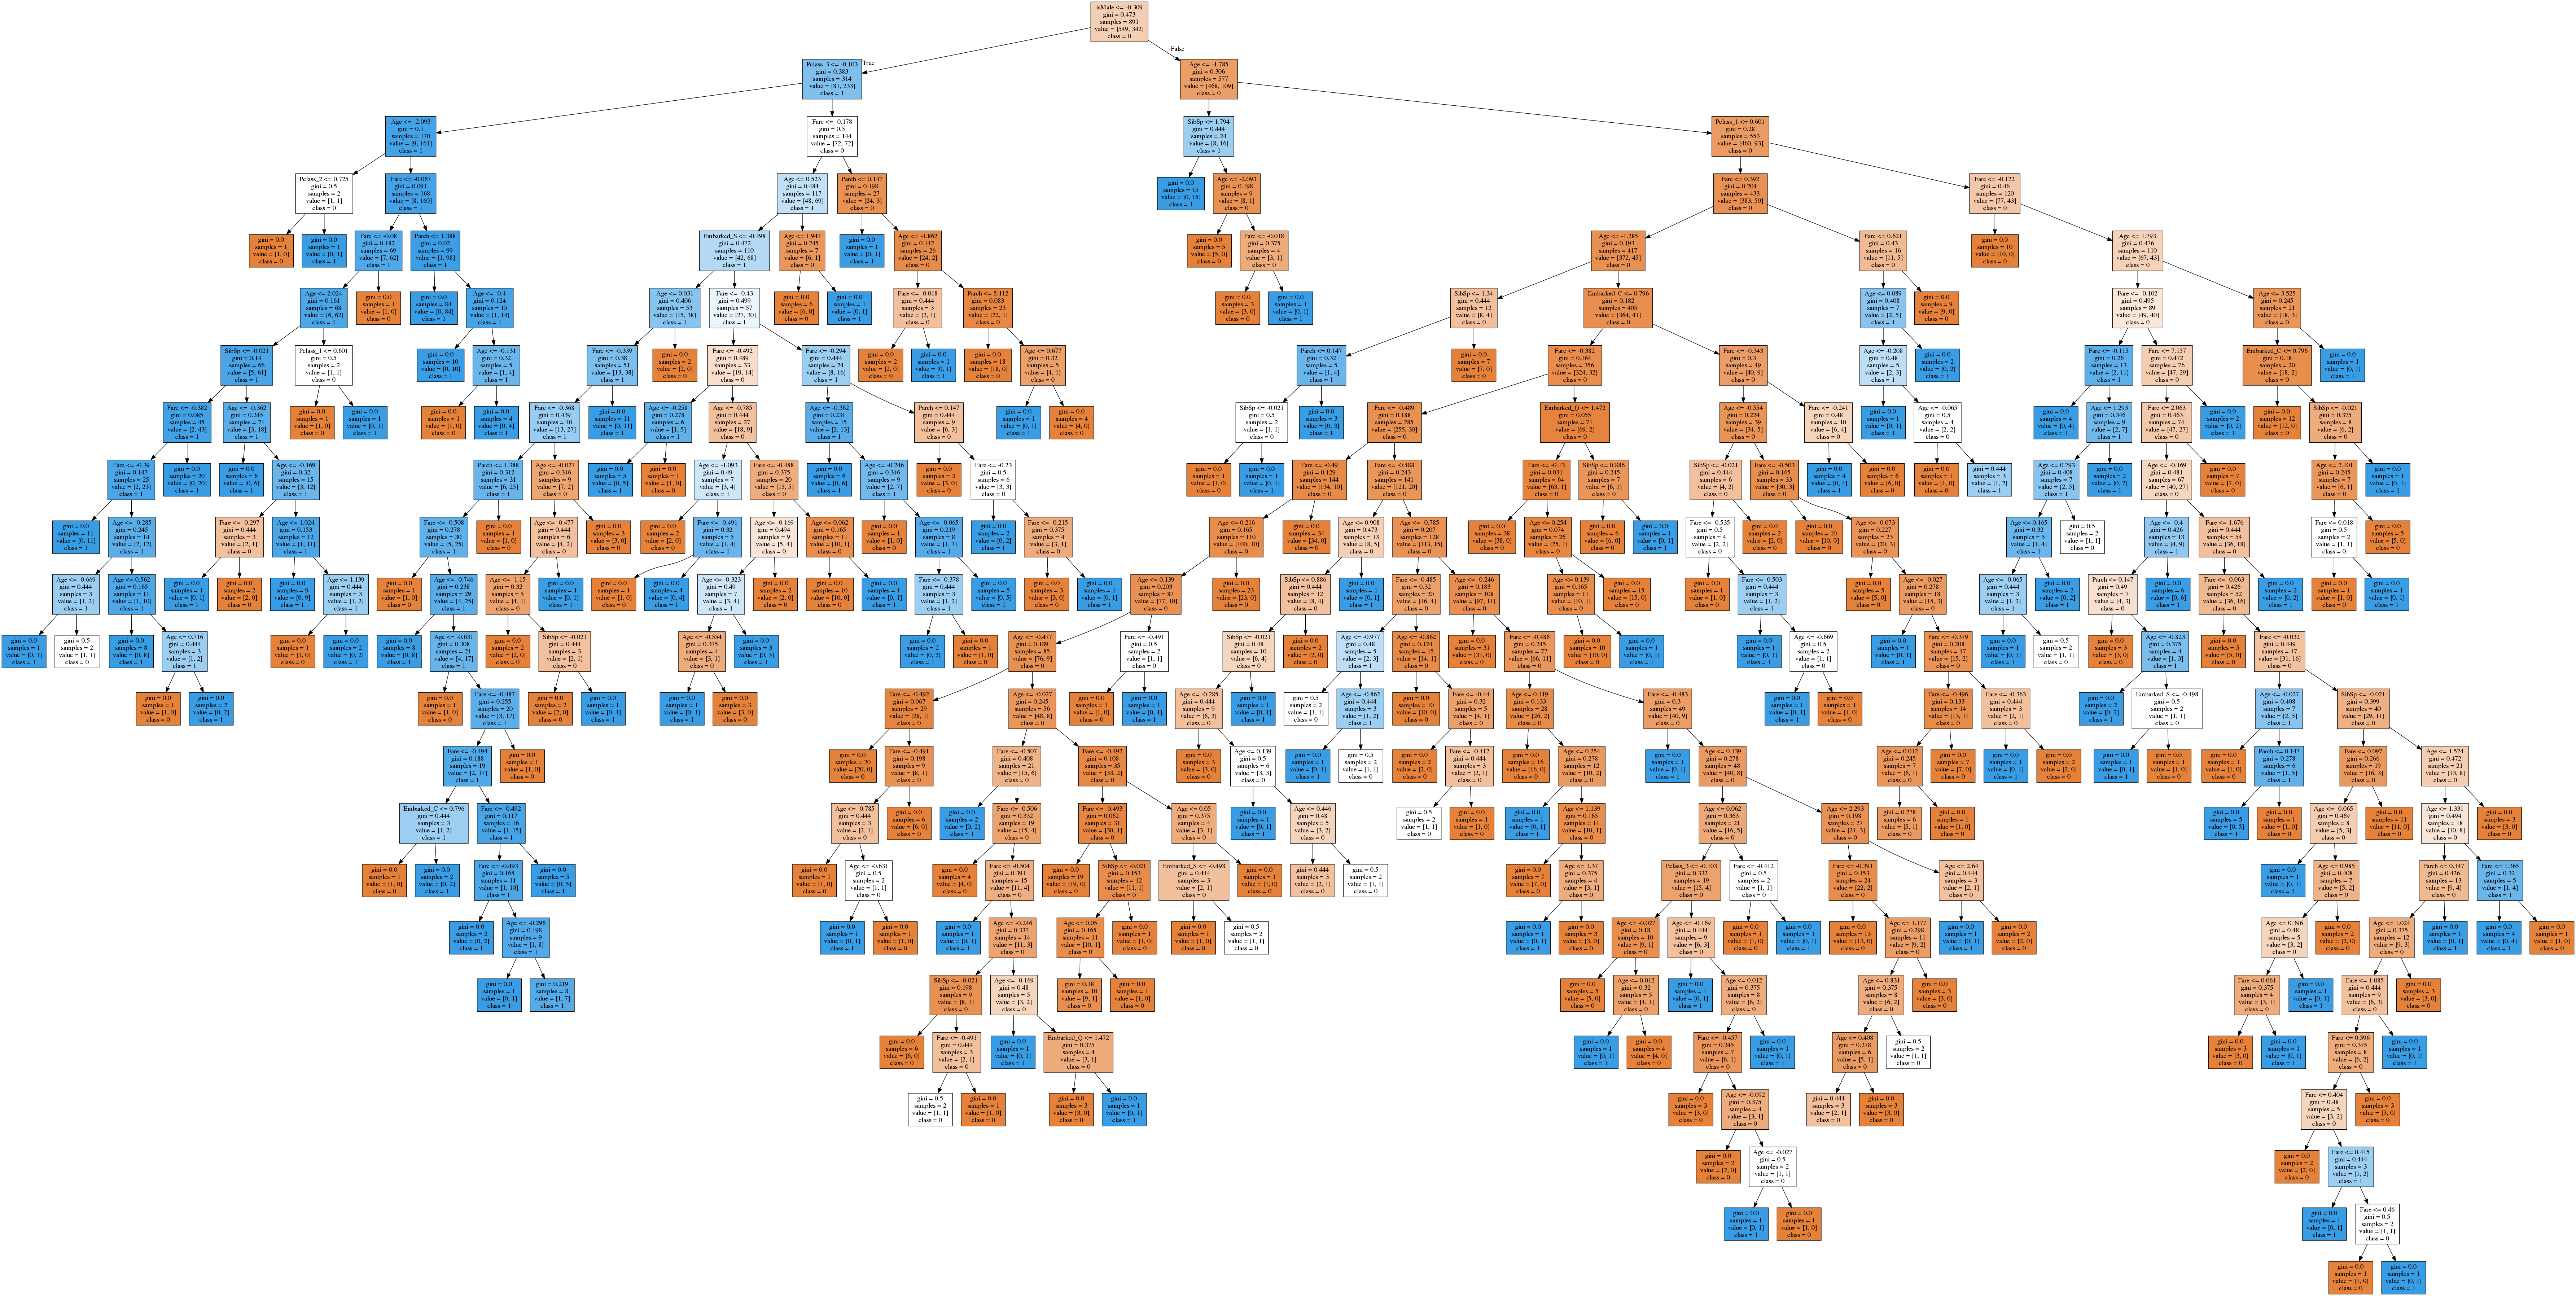

In [140]:
#too big depth (21)

In [348]:
clf.predict(data_test_for_predictions)

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [30]:
from sklearn.model_selection import GridSearchCV, cross_val_score
#clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, data_train, Y_train, cv=5)
scores

array([0.74301676, 0.77094972, 0.79213483, 0.74719101, 0.8079096 ])

In [41]:
tree_params = {'max_depth': range(1,21),
'max_features': range(3,11), 'min_samples_leaf': range(1,20)}

In [42]:
tree_grid = GridSearchCV(clf, tree_params,
cv=5, n_jobs=-1,
verbose=True)

In [43]:
tree_grid.fit(data_train, Y_train)

Fitting 5 folds for each of 3040 candidates, totalling 15200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 326 tasks      | elapsed:   29.0s
[Parallel(n_jobs=-1)]: Done 3926 tasks      | elapsed:   48.4s
[Parallel(n_jobs=-1)]: Done 9926 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 15200 out of 15200 | elapsed:  1.9min finished
/home/arseny/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': range(1, 21), 'max_features': range(3, 11), 'min_samples_leaf': range(1, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [44]:
tree_grid.best_params_

{'max_depth': 16, 'max_features': 10, 'min_samples_leaf': 5}

In [45]:
tree_grid.best_score_

0.8338945005611672

In [47]:
from sklearn.metrics import accuracy_score

In [48]:
accuracy_score(Y_test, tree_grid.predict(data_test))

0.8715083798882681

In [58]:
#clf.predict(data_test_for_predictions).shape
#original_data_test.PassengerId

In [61]:
predictions = tree_grid.predict(data_test_for_predictions)
#len(predictions)

submussion = 'PassengerId,Survived\n'
submussion += "\n".join(["{},{}".format(pid, prediction) \
                         for pid, prediction in zip(original_data_test.PassengerId, predictions)])

In [63]:
with open('submission.txt', 'w') as file:
    file.write(submussion)

In [65]:
!ls

'1 decision trees.ipynb'	      'ML 1 - Decision Trees.pdf'
'2 competition.ipynb'		       Source.gv
'3 metrics.ipynb'		       Source.gv.png
'4 vedomosti parsing.ipynb'	       submission.txt
'5 vedomosti classifying.ipynb'        titanic_decision_tree.svg
 data				       titanic_max_depth_5.png
'hw5_2 homework decision tree.ipynb'   titanic_tree_wo_depth_limit.png


In [148]:
def titanic_tree(criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2):
    clf=DecisionTreeClassifier(criterion=criterion, max_depth=max_depth,
            max_features=max_features, max_leaf_nodes=max_leaf_nodes,
            min_impurity_decrease=min_impurity_decrease, min_impurity_split=min_impurity_split,
            min_samples_leaf=min_samples_leaf, min_samples_split=min_samples_split)
    clf.fit(data_train, Y_train)
    ret=[]
    Accuracy=1-sum(abs(clf.predict(data_test)-Y_test))/len(Y_test)
    Precision=sum(clf.predict(data_test)*Y_test)/ \
        (sum(abs(clf.predict(data_test)*Y_test))+sum(clf.predict(data_test)*(1-Y_test)))
    Recall=sum(clf.predict(data_test)*Y_test)/ \
        (sum(clf.predict(data_test)*Y_test)+sum((1-clf.predict(data_test))*Y_test))
    F1=2*Precision*Recall/(Precision+Recall)
    ret.extend([Accuracy, Precision, Recall, F1])
    X = data_train

    # target vector
    y = Y_train

    # class labels
    labels = data_train.columns

    graph = Source(tree.export_graphviz(clf, out_file=None#'titanic_decision_tree.svg'
       , feature_names=labels, class_names=['0', '1'] 
       , filled = True))
    display(SVG(graph.pipe(format='svg')))
    
    graph.format='png'
    graph.render()
    return ret

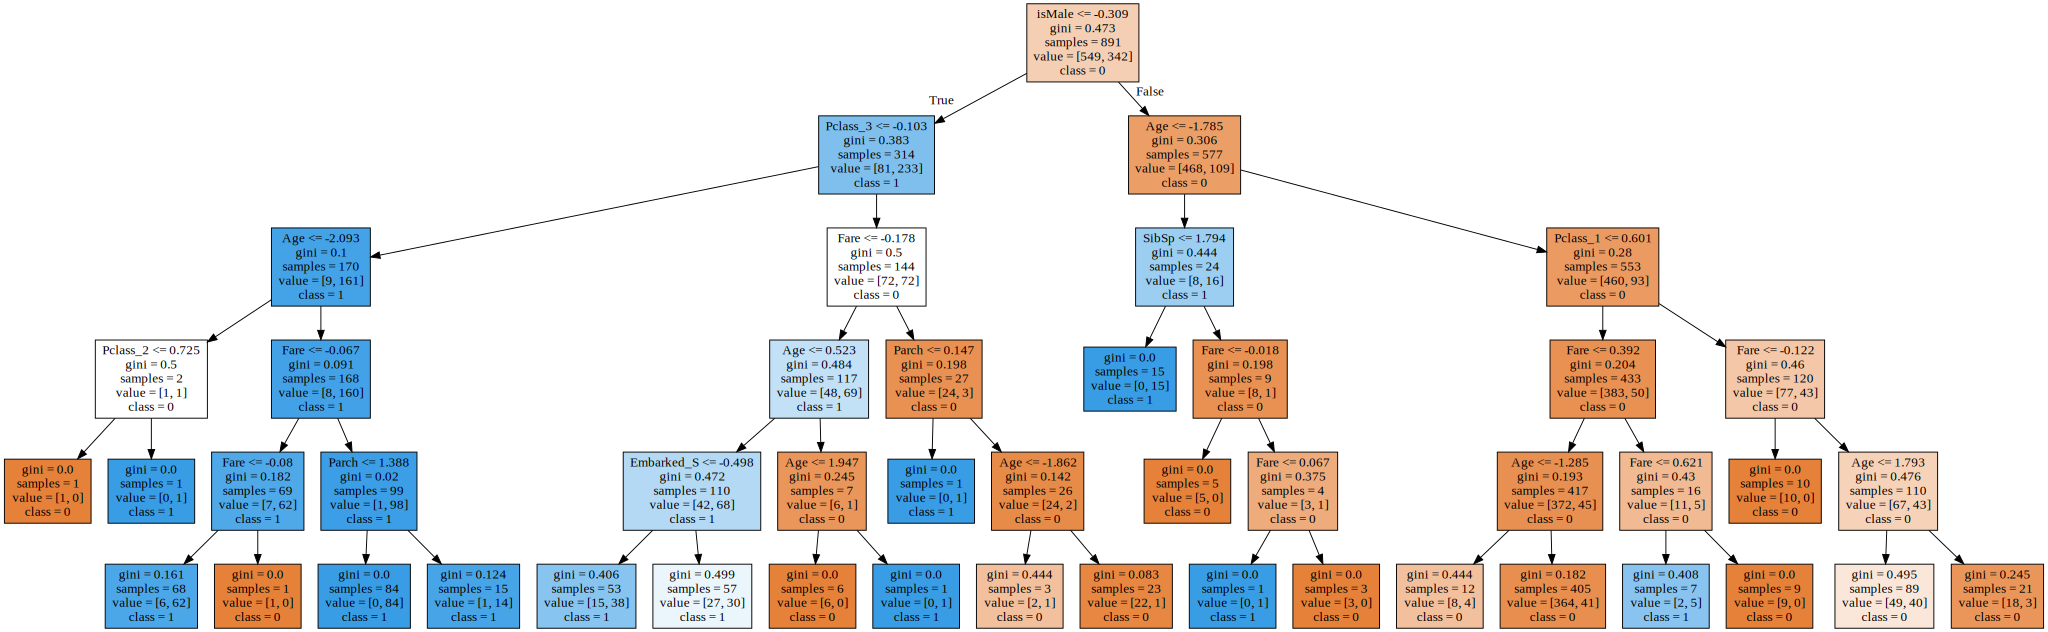

[0.8435754189944134,
 0.8727272727272727,
 0.6956521739130435,
 0.7741935483870968]

In [334]:
titanic_tree(max_depth=5)

In [150]:
col = ['model', 'Accuracy', 'Precision', 'Recall', 'F1-Score']

#ind = ['model_pow_%d' % i for i in range(1, 16)]
ind = [i for i in range(17)]
diff_trees_matrix = pd.DataFrame(index=ind, columns=col)

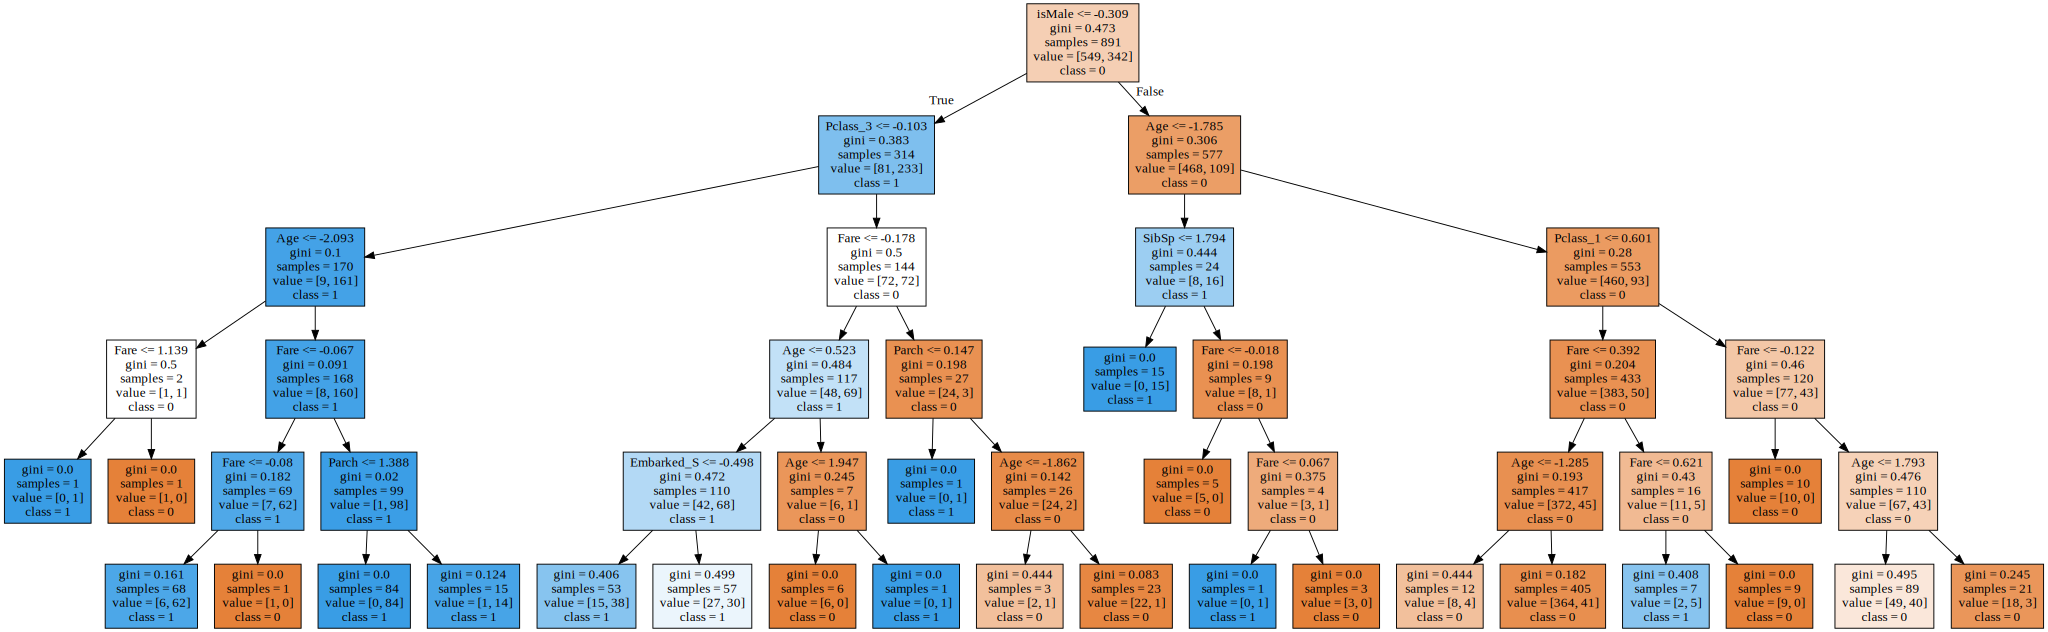

In [154]:
diff_trees_matrix.iloc[0, 0 ]='tree_maxdep_5'
diff_trees_matrix.iloc[0, 1:5 ]=titanic_tree(max_depth=5)

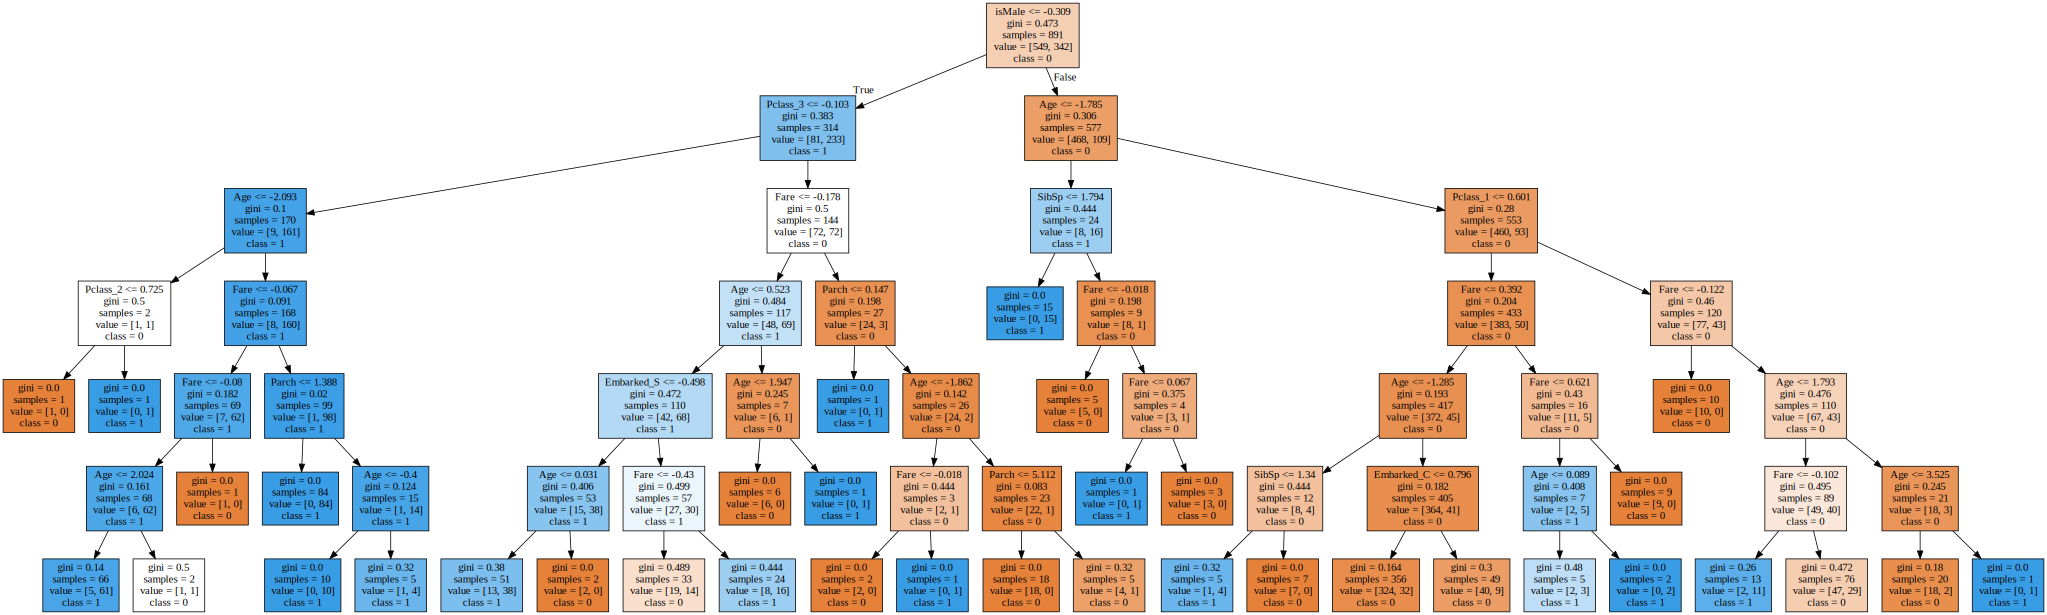

In [159]:
diff_trees_matrix.iloc[1, 0 ]='tree_maxdep_6'
diff_trees_matrix.iloc[1, 1:5 ]=titanic_tree(max_depth=6)

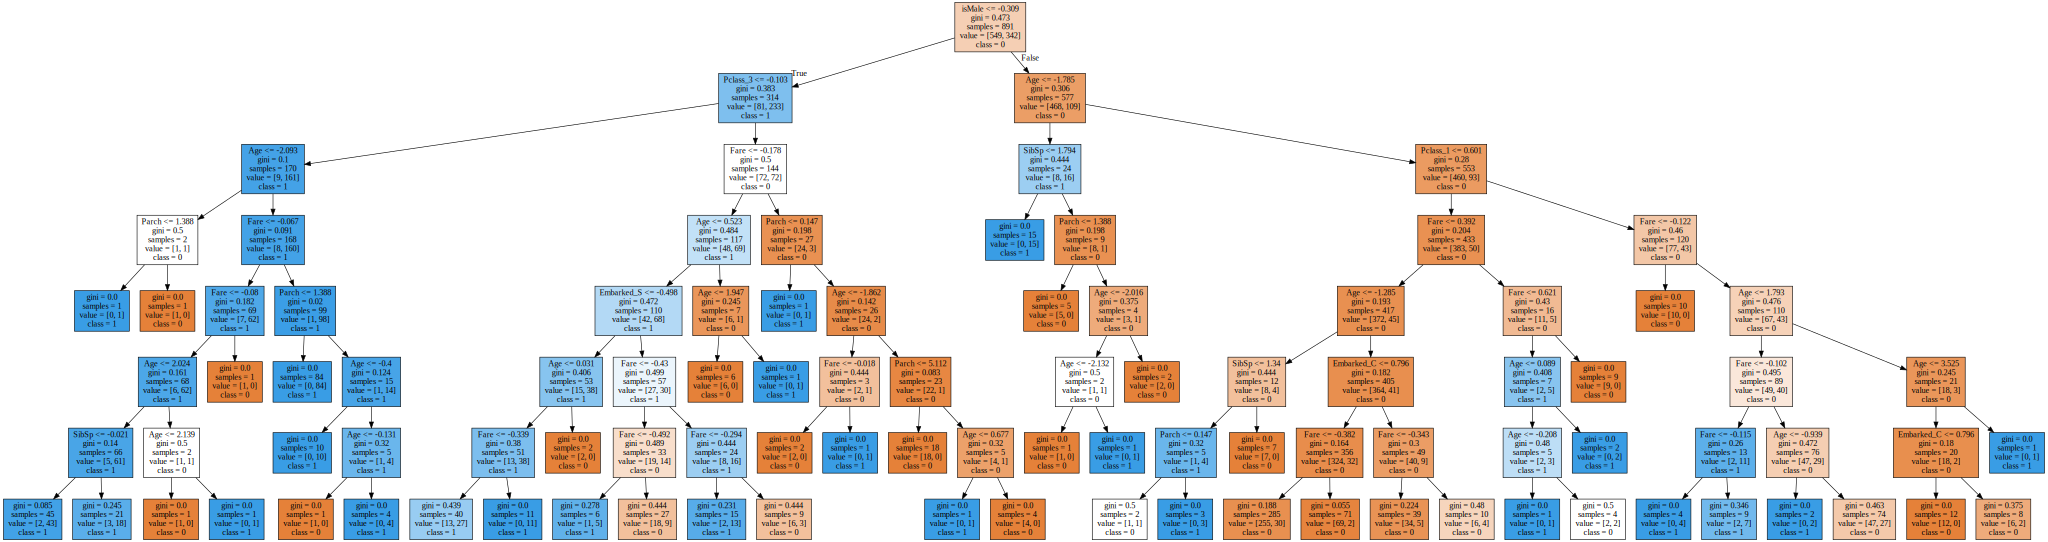

In [161]:
diff_trees_matrix.iloc[2, 0 ]='tree_maxdep_7'
diff_trees_matrix.iloc[2, 1:5 ]=titanic_tree(max_depth=7)

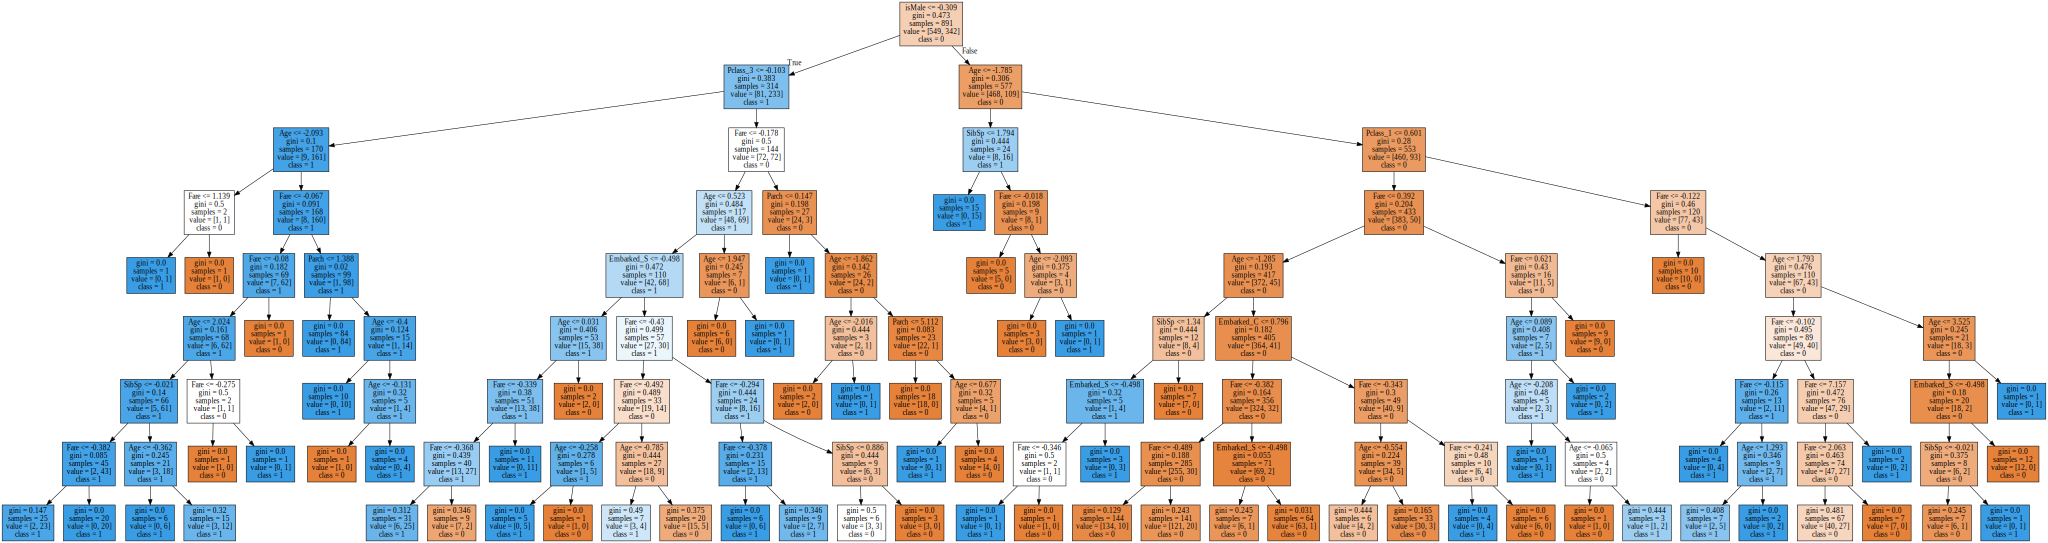

In [165]:
diff_trees_matrix.iloc[3, 0 ]='tree_maxdep_8'
diff_trees_matrix.iloc[3, 1:5 ]=titanic_tree(max_depth=8)

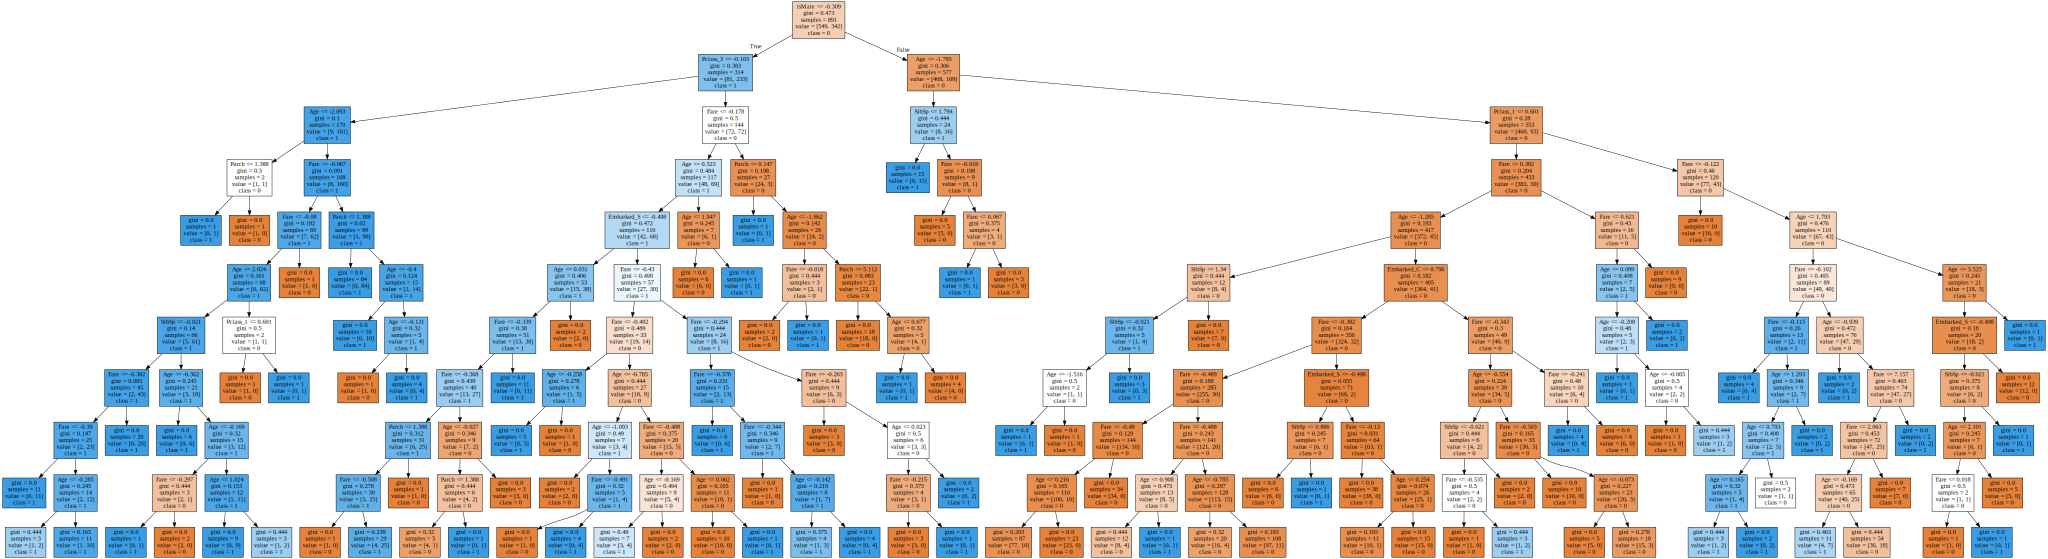

In [167]:
diff_trees_matrix.iloc[4, 0 ]='tree_maxdep_10'
diff_trees_matrix.iloc[4, 1:5 ]=titanic_tree(max_depth=10)

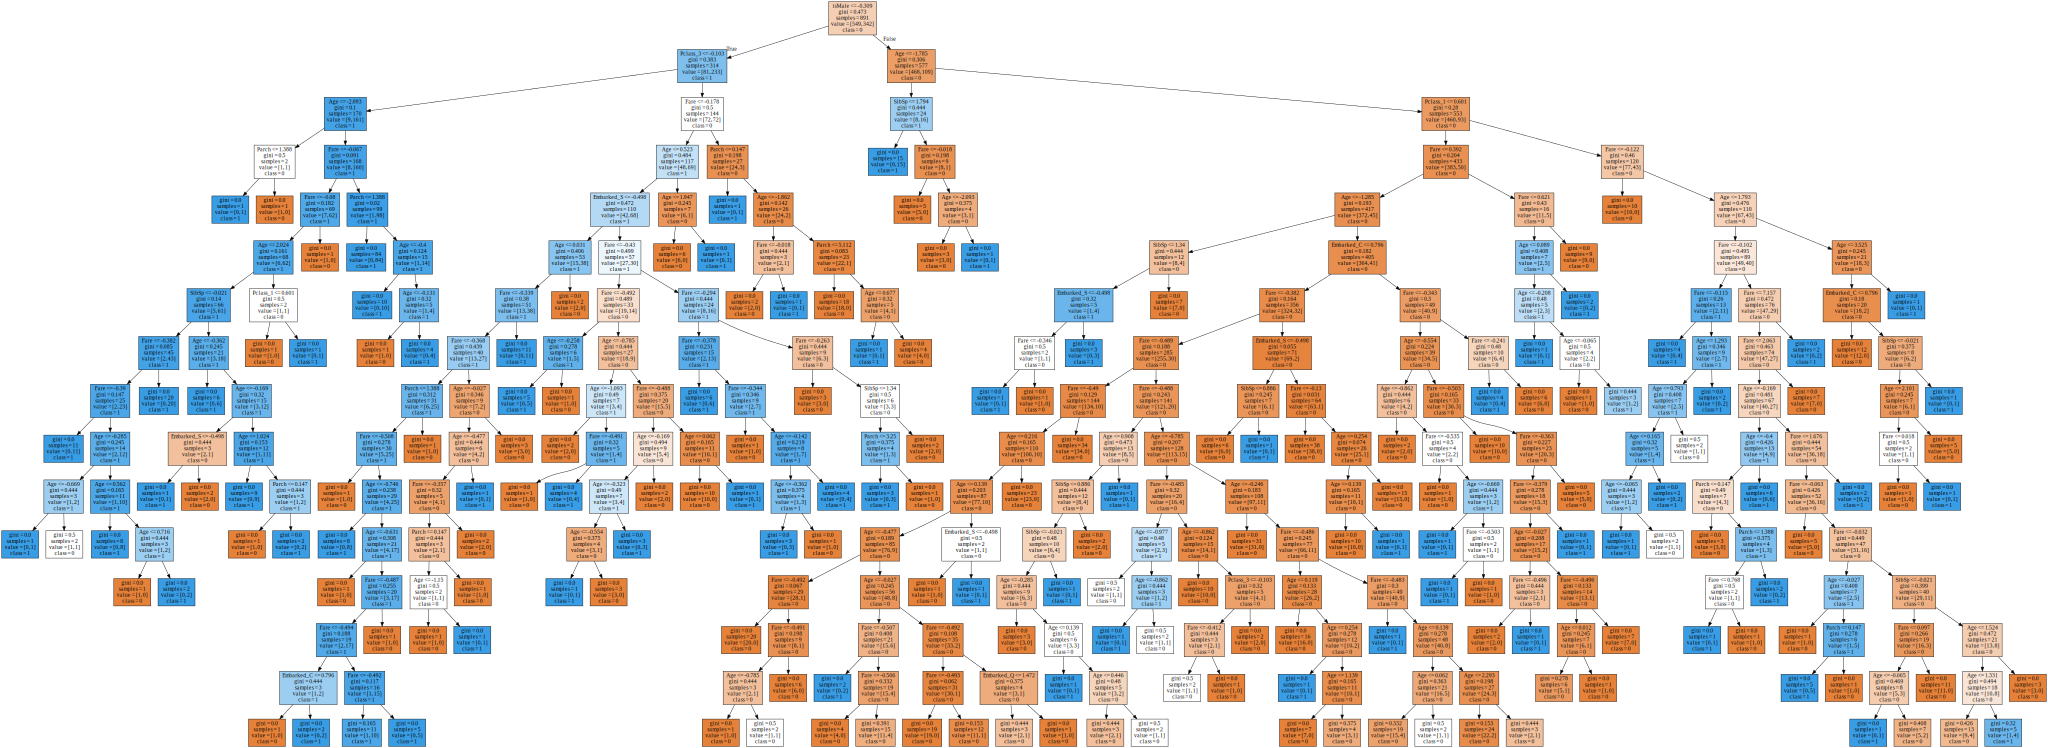

In [185]:
diff_trees_matrix.iloc[5, 0 ]='tree_maxdep_15'
diff_trees_matrix.iloc[5, 1:5 ]=titanic_tree(max_depth=15)

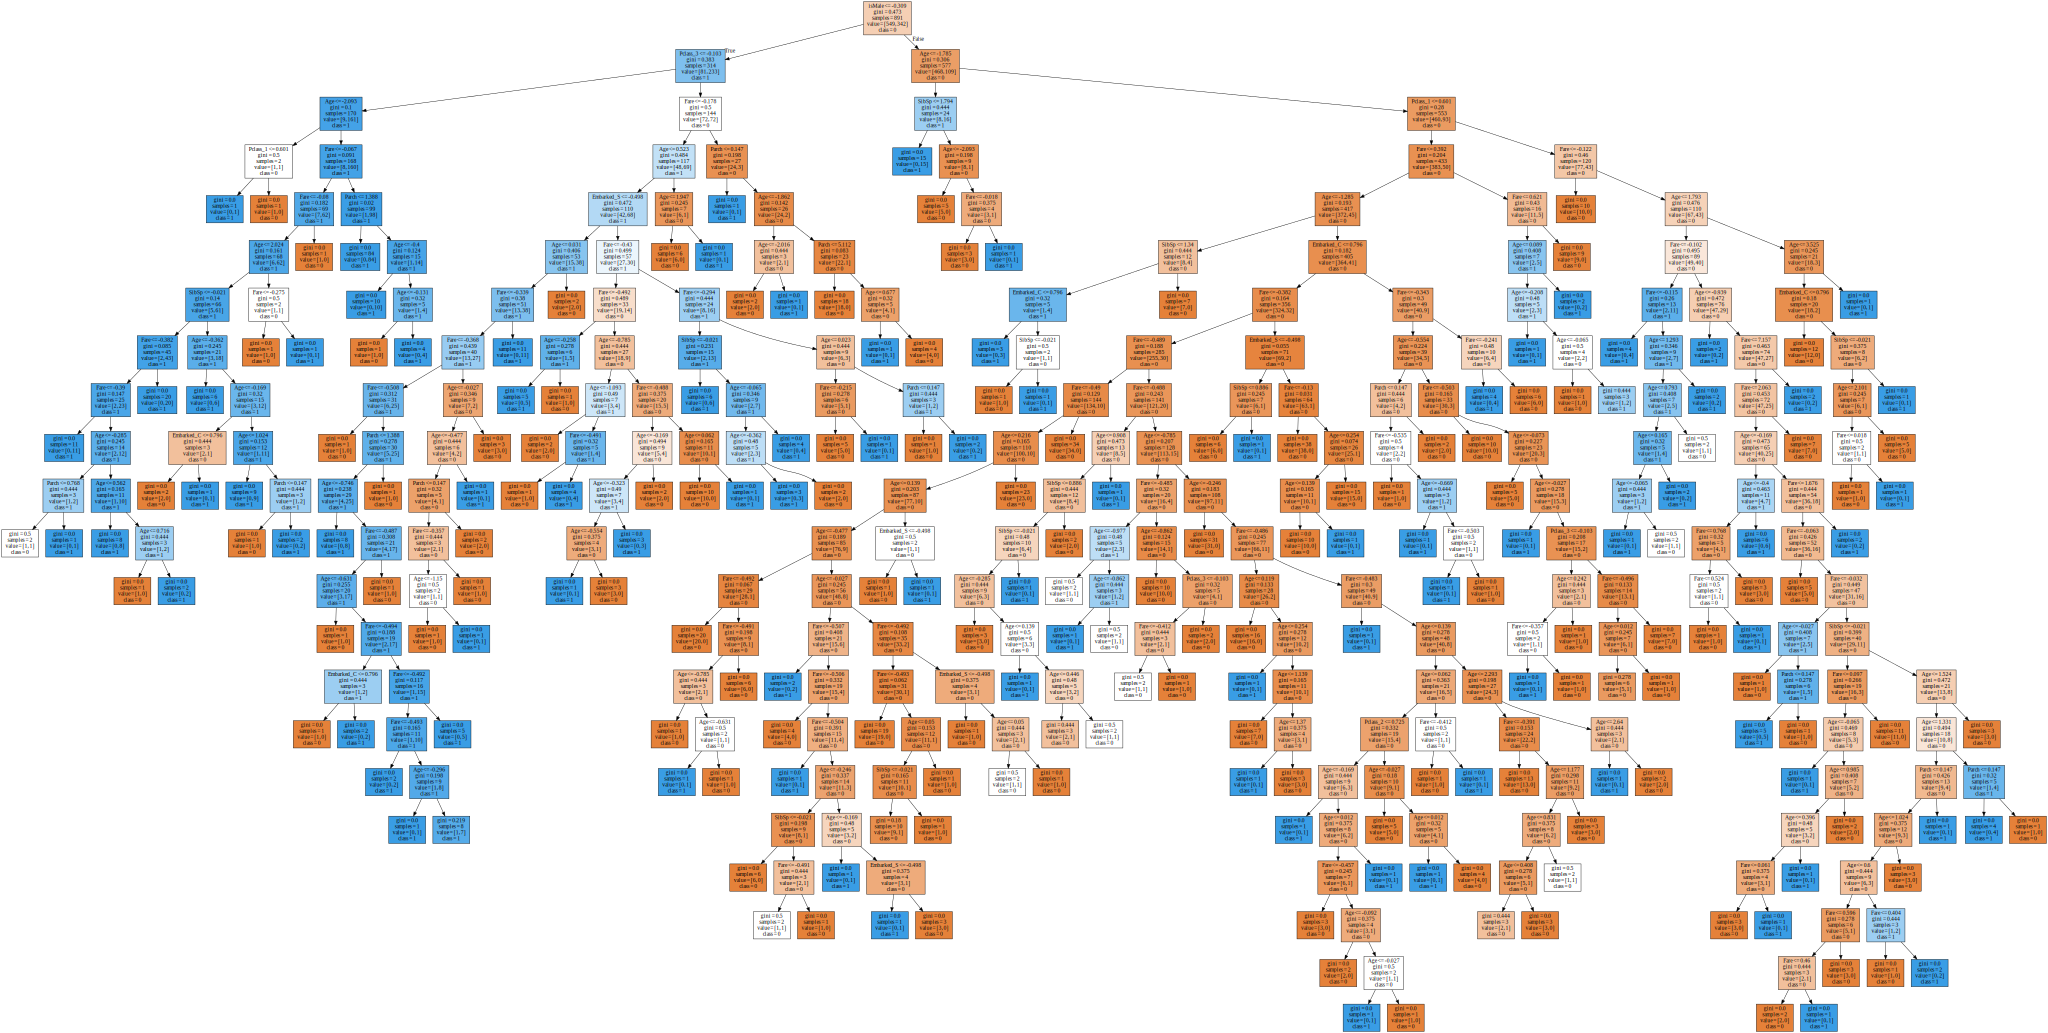

In [335]:
diff_trees_matrix.iloc[6, 0 ]='tree_maxdep_any'
diff_trees_matrix.iloc[6, 1:5 ]=titanic_tree()

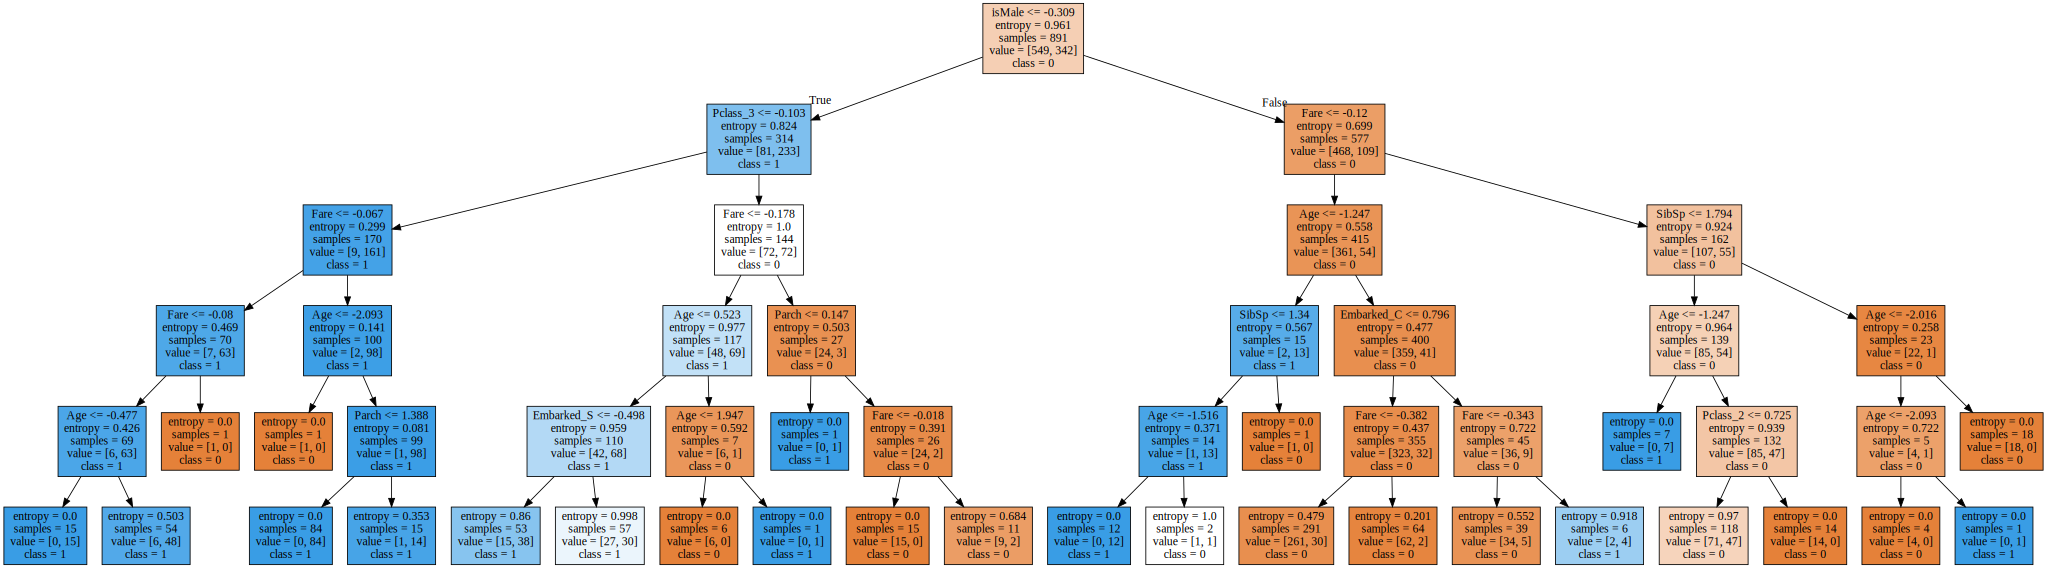

In [179]:
diff_trees_matrix.iloc[7, 0 ]='tree_maxdep_5_entropy'
diff_trees_matrix.iloc[7, 1:5 ]=titanic_tree(criterion='entropy',max_depth=5)

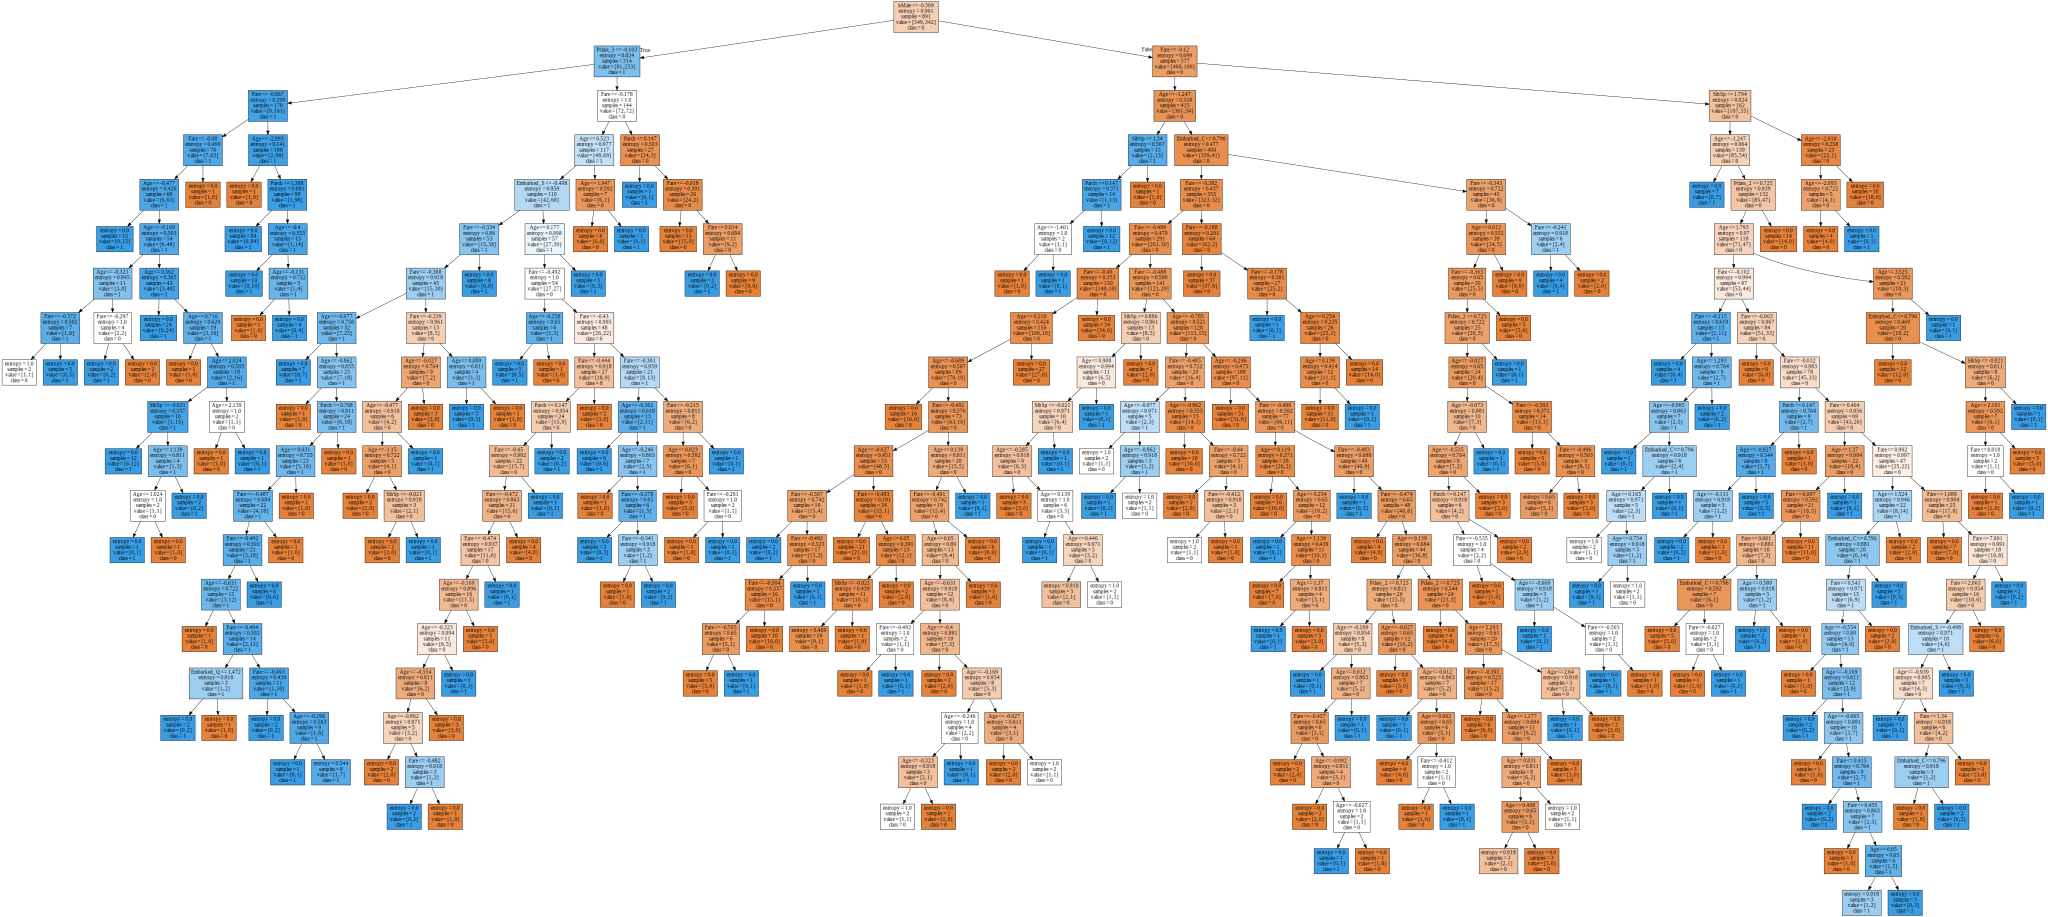

In [180]:
diff_trees_matrix.iloc[8, 0 ]='tree_maxdep_any_entropy'
diff_trees_matrix.iloc[8, 1:5 ]=titanic_tree(criterion='entropy')

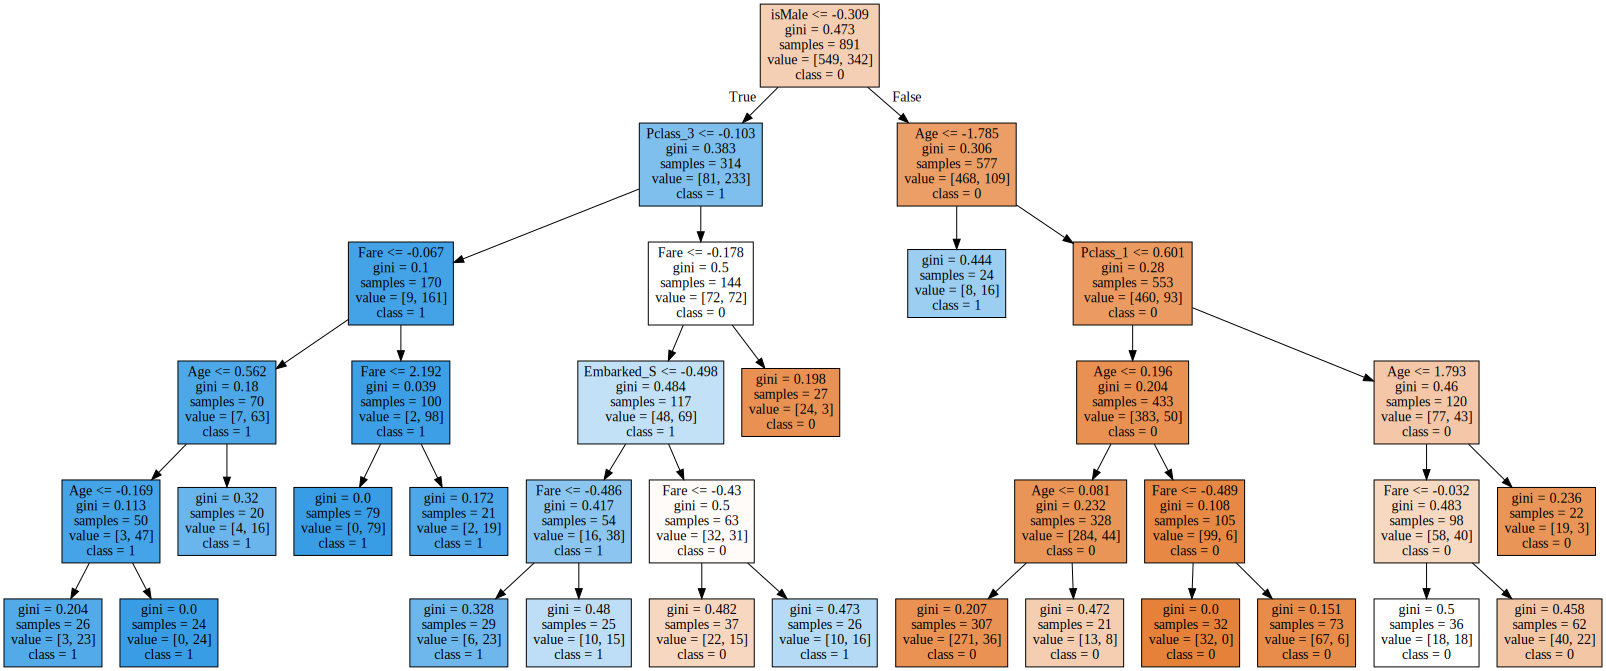

In [184]:
diff_trees_matrix.iloc[9, 0 ]='tree_maxdep_5___samples_leaf_20'
diff_trees_matrix.iloc[9, 1:5 ]=titanic_tree(max_depth=5, min_samples_leaf=20)

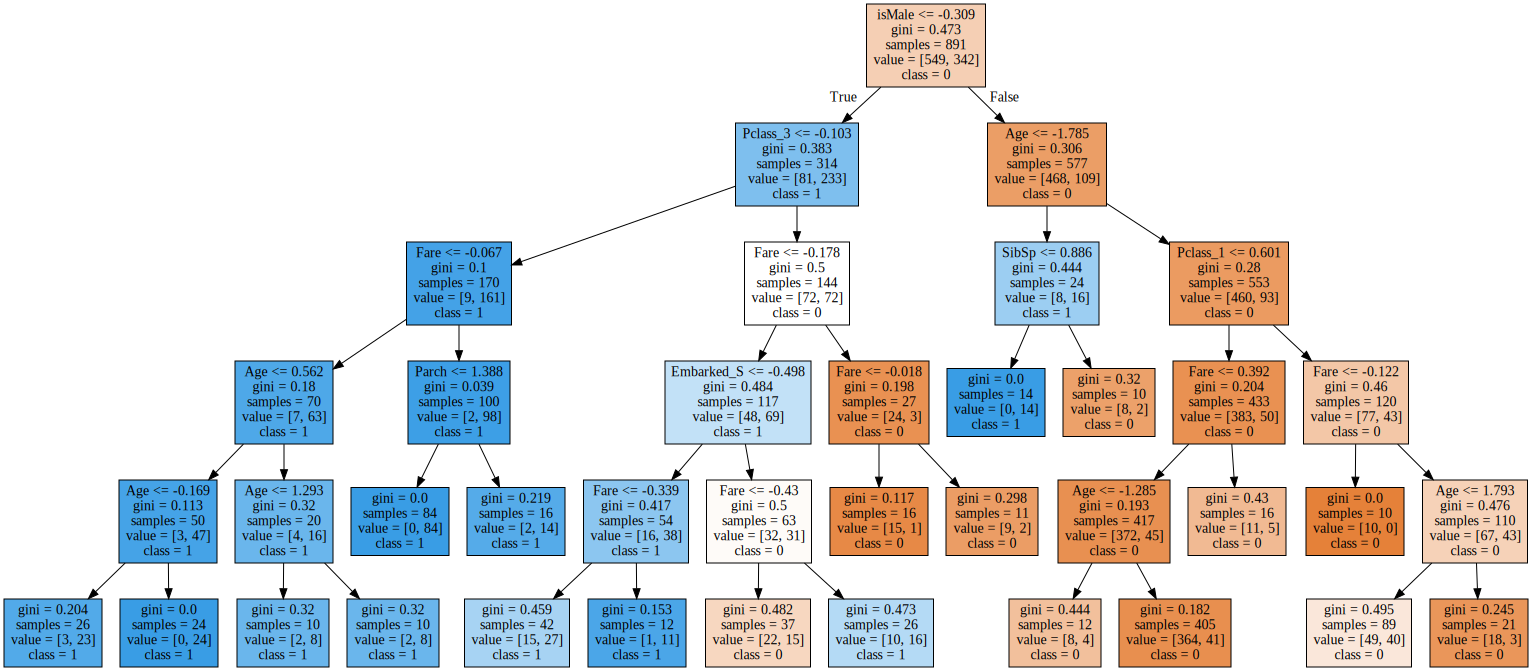

In [187]:
diff_trees_matrix.iloc[10, 0 ]='tree_maxdep_5___samples_leaf_10'
diff_trees_matrix.iloc[10, 1:5 ]=titanic_tree(max_depth=5, min_samples_leaf=10)

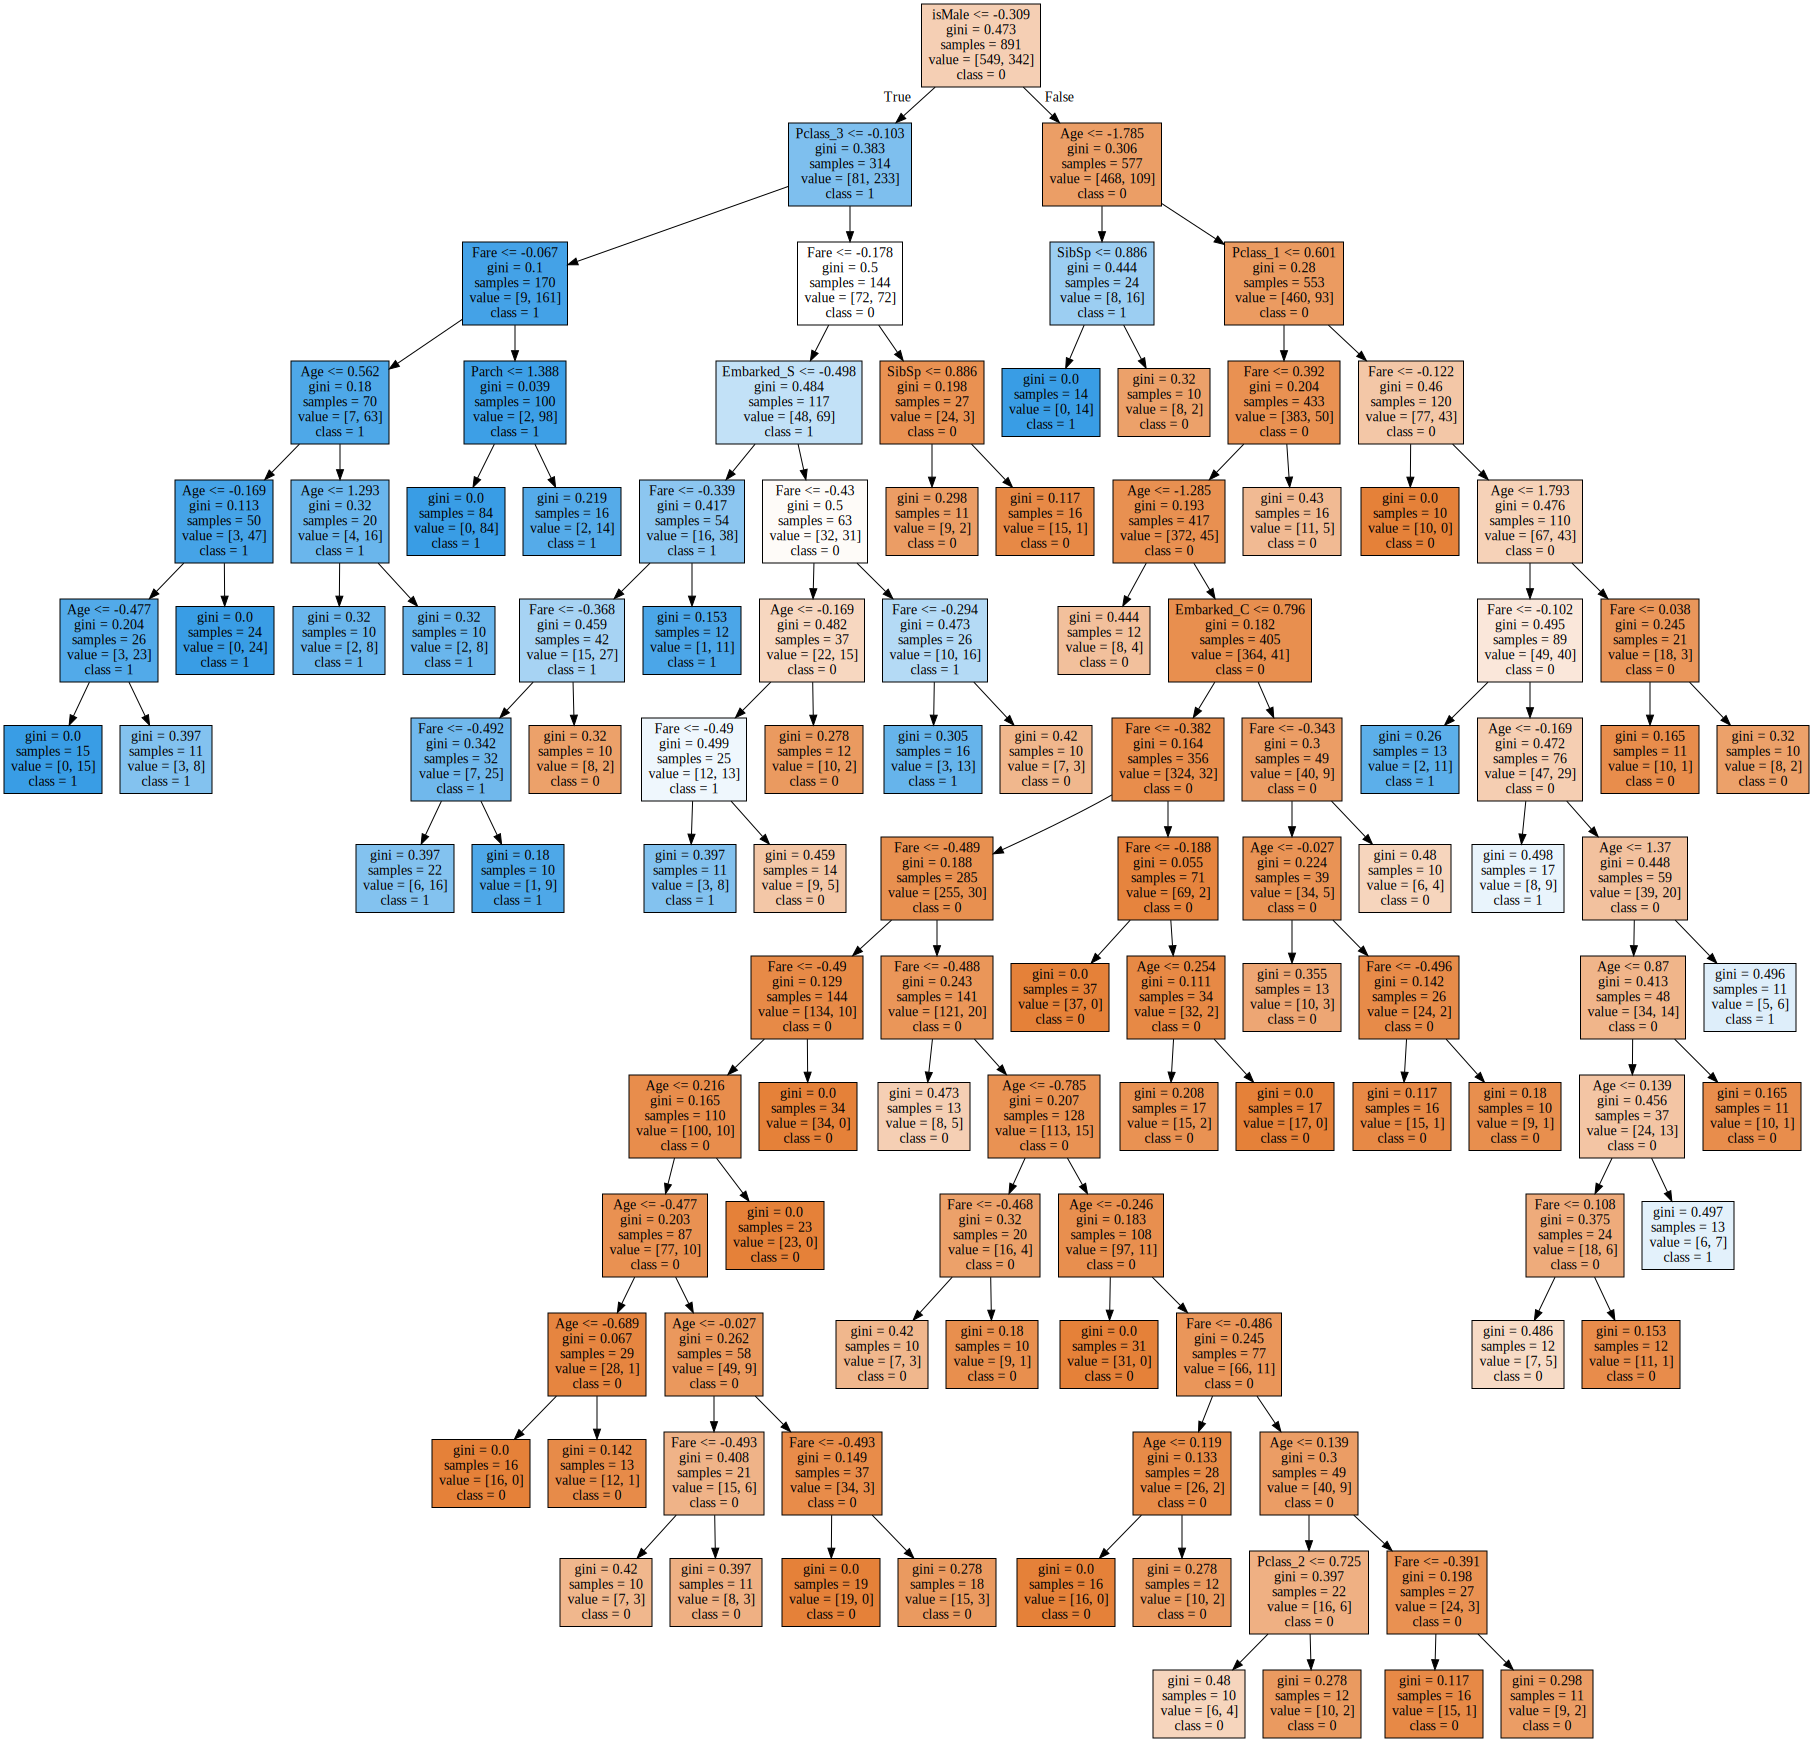

In [189]:
diff_trees_matrix.iloc[11, 0 ]='tree_maxdep_any___samples_leaf_10'
diff_trees_matrix.iloc[11, 1:5 ]=titanic_tree(min_samples_leaf=10)

In [ ]:
diff_trees_matrix.iloc[12, 0 ]='tree_maxdep_16___samples_leaf_5_features_10'
diff_trees_matrix.iloc[12, 1:5 ]=titanic_tree(max_depth=16, max_features=10, min_samples_leaf=5)
#'max_depth': 16, 'max_features': 10, 'min_samples_leaf': 5

In [236]:
diff_trees_matrix.head(12)

model  Accuracy Precision    Recall  F1-Score
0                     tree_maxdep_5  0.843575  0.872727  0.695652  0.774194
1                     tree_maxdep_6  0.849162  0.903846  0.681159   0.77686
2                     tree_maxdep_7  0.854749  0.938776  0.666667  0.779661
3                     tree_maxdep_8  0.882682  0.944444   0.73913  0.829268
4                    tree_maxdep_10  0.916201  0.982143  0.797101      0.88
5                    tree_maxdep_15  0.949721         1  0.869565  0.930233
6                   tree_maxdep_any  0.972067         1  0.927536  0.962406
7             tree_maxdep_5_entropy  0.849162     0.875  0.710145     0.784
8           tree_maxdep_any_entropy  0.972067         1  0.927536  0.962406
9   tree_maxdep_5___samples_leaf_20  0.804469      0.84  0.608696  0.705882
10  tree_maxdep_5___samples_leaf_10  0.821229  0.911111  0.594203  0.719298

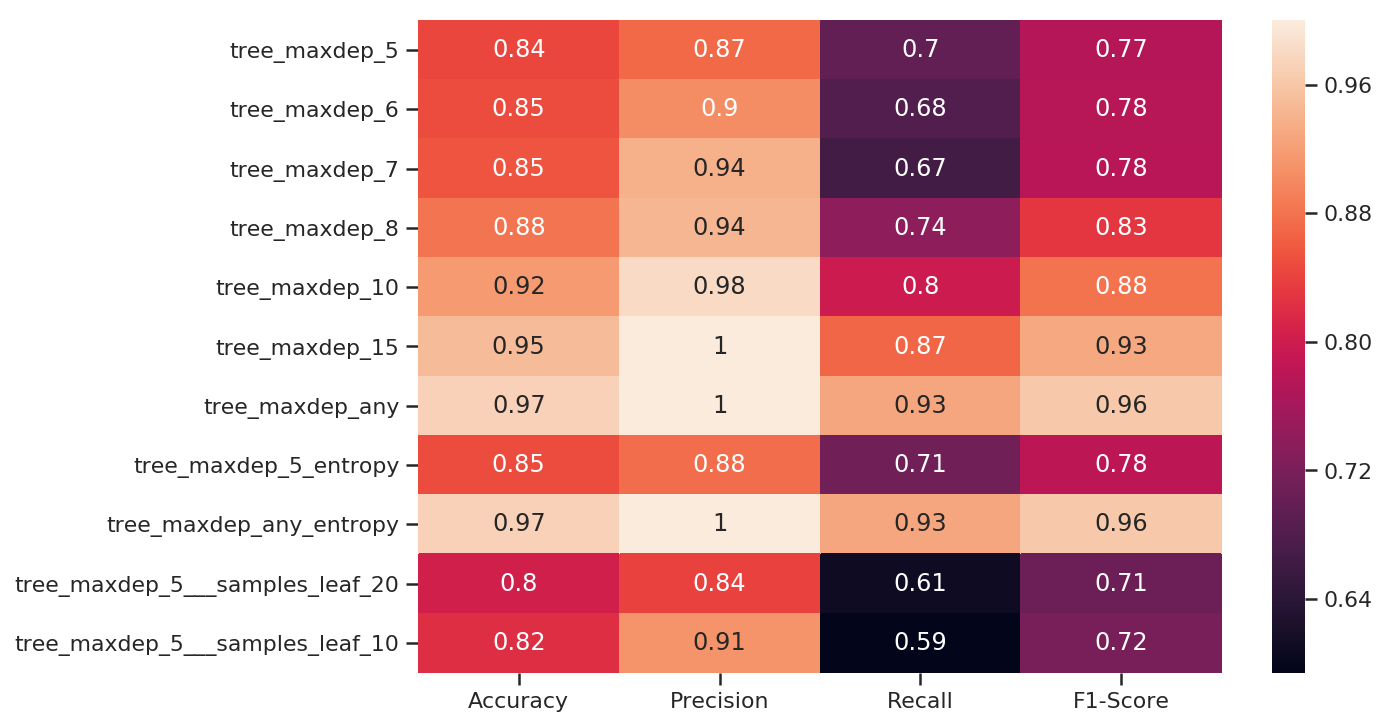

In [254]:
#piv=diff_trees_matrix.set_index('model').head(11)
ind=list(diff_trees_matrix['model'].head(12))
#ind
colu=['Accuracy', 'Precision', 'Recall', 'F1-Score']
dat=diff_trees_matrix.iloc[0:12, 1:5 ].values

piv=pd.DataFrame(dat, index=ind, columns=colu)
piv = piv[piv.columns].astype(float)
fig, ax = plt.subplots(figsize=(9, 6) )
sns.heatmap(piv, annot=True)


## * С помощью функций sklearn.metrics.auc, precision, recall составить функцию для расчёта ROC-AUC, ROC-PRC

In [201]:
from sklearn.metrics import auc, recall_score, precision_score 
#from metrics import auc, precision, recall
#.auc, precision, recall#sklearn.metrics.auc, precision, recall

In [310]:
clf=DecisionTreeClassifier(criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2)
clf.fit(data_train, Y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [329]:
#clf.predict_proba(data_test)[:,0]
alpha=np.arange(1.0,0.0, -0.05)
recalsc=[]
precissc=[]
True_pos_rt=[]
False_pos_rt=[]
for alp in alpha:
    new_prob=(clf.predict_proba(data_test)[:,1] >alp)*1
    recalsc.append(recall_score(Y_test, new_prob))
    precissc.append(precision_score(Y_test, new_prob))
    
    true_pos=np.dot(new_prob,Y_test)
    false_pos=np.dot(new_prob,(1-Y_test))
    false_neg=np.dot((1-new_prob),Y_test)
    true_neg=np.dot((1-new_prob),(1-Y_test))
    
    True_pos_rt.append(true_pos/   (true_pos+false_neg)       ) 
    
    
    False_pos_rt.append(false_pos/(false_pos+true_neg))
#alpha
#new_prob
print('recall', 'precis' )
for i in zip(recalsc,precissc):
    print(i)

print('False_pos_rt, True_pos_rt')
for s in zip(False_pos_rt, True_pos_rt):
    print(s)

recall precis
(0.0, 0.0)
(0.2898550724637681, 1.0)
(0.463768115942029, 1.0)
(0.463768115942029, 1.0)
(0.463768115942029, 1.0)
(0.463768115942029, 1.0)
(0.5652173913043478, 0.975)
(0.5652173913043478, 0.975)
(0.5652173913043478, 0.975)
(0.5652173913043478, 0.975)
(0.6956521739130435, 0.8727272727272727)
(0.6956521739130435, 0.8727272727272727)
(0.8260869565217391, 0.7916666666666666)
(0.8260869565217391, 0.7916666666666666)
(0.8405797101449275, 0.7837837837837838)
(0.8405797101449275, 0.7837837837837838)
(0.8405797101449275, 0.7837837837837838)
(0.8405797101449275, 0.7837837837837838)
(1.0, 0.41566265060240964)
(1.0, 0.41566265060240964)
False_pos_rt, True_pos_rt
(0.0, 0.0)
(0.0, 0.2898550724637681)
(0.0, 0.463768115942029)
(0.0, 0.463768115942029)
(0.0, 0.463768115942029)
(0.0, 0.463768115942029)
(0.00909090909090909, 0.5652173913043478)
(0.00909090909090909, 0.5652173913043478)
(0.00909090909090909, 0.5652173913043478)
(0.00909090909090909, 0.5652173913043478)
(0.06363636363636363, 0.

/home/arseny/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


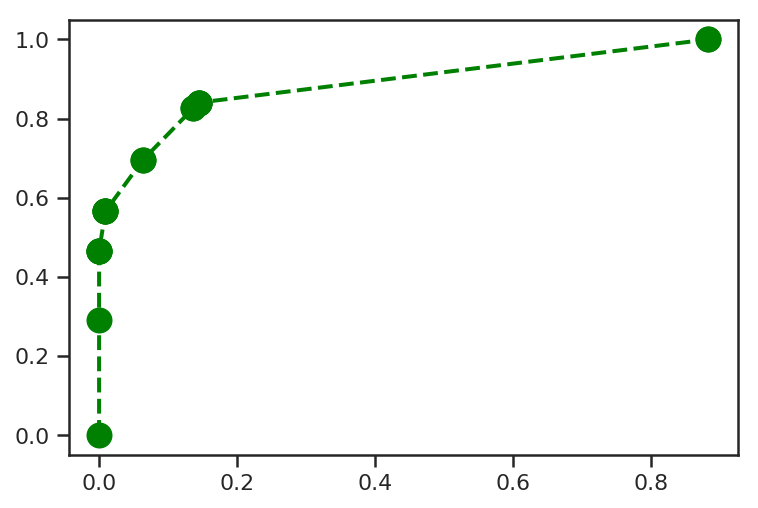

In [331]:
#plt.scatter()
plt.plot(False_pos_rt,True_pos_rt, color='green', marker='o', linestyle='dashed',
         linewidth=2, markersize=12#, x1, y2, 'k', x1, y3, 'r--'
        )

In [333]:
roc_auc=auc(False_pos_rt,True_pos_rt)
roc_auc

0.7796442687747035

In [ ]:
plt.plot(rs, ps, color='green', marker='o', linestyle='dashed',
         linewidth=2, markersize=12#, x1, y2, 'k', x1, y3, 'r--'
        )

**Lvl 2:** (опционально)

* С помощью функций sklearn.metrics.auc, precision, recall составить функцию для расчёта ROC-AUC, ROC-PRC
* Придумать себе интересную задачу на основе данных из интернета =) Спарсить ещё какой-нибудь сайт (не Ведомости) и решить задачу классификации. Делать свои проекты - круто. Если будут - кидайте мне =) [@NikitaKuznetsov](http://t.me/NikitaKuznesov)

In [ ]:
#парсинг после выполнения других домашних заданий (кластеризация, леса, ансамбли)